# MIE 1624 Course Project : Group 4
Objective : <br>
- Redesign the course curriculum for "MIE 1624 : Introduction to Data Science and Analytics" at the University of Toronto such that students acquire an introduction to the most relevant topics and skills in data science.
- Design a curriculum for a new professional "Master of Data Science and Analytics" program with a technical emphasis
- Design a curriculum for a new professional "Master of Business and Management of Analytics and AI" program with business and soft skills focus

# 1. Course curriculum Design 

Goal : 
Redesign the course curriculum for "MIE 1624 : Introduction to Data Science and Analytics" at the University of Toronto such that students acquire an introduction to the most relevant topics and skills in data science. The topics selection can be based on the skills required for data analyst/scientist job postings from websites like http://www.indeed.ca (may need to do web-scraping), and Kaggle ML and Data Science Survey http://www.kaggle.com/kaggle/kaggle-survey-2017/ on curriculums of courses offered on online platforms, such as http://CognitiveClass.ai, Coursera, EdX, DataCamp, and/or any other data that your team can find or collect yourself. 
 




## Overview of gathering data 

We choose to gather data via web scraping from the following site : <br>
- indeed.ca
- indeed.com

Please note that some sections of the code have been commented out as they pertain to web scrapping which takes a long time. All neccessary files have been given to run code that were not commented out

### To gather data:

a) We webscrape indeed.ca and indeed.com to aqcuire data for '_data scientist_' job postings from several Canadian and American cities  <br>

We acquire the following information:
- city
- location
- job title 
- company name
- salary 
- link to job posting <br>

b) create a bag of technical words <br>

c) click on link to each job posting from step (a) and extract the tehnical skills using the bag of technical words created in step (b) <br>

Note:

We look at the following Canadian Cities:<br>
- Toronto
- Vancouver 
- Montreal
- Calgary
- Waterloo
- Halifax
- Ottawa
- Winnipeg
- Edmonton

We look at the following American Cities: <br>
- Washington DC
- Boulder
- New York
- Chicago
- San Francisco
- Austin
- Seattle
- Los Angles
- Philadelphia
- Atlanta
- Dallas
- Pittsburgh
- PortLand
- Phoenix
- Denver
- Houston

### Import libraries (ensure that the following libraries are installed)
To begin, we import the following libraries:
 - bs4 -- (BeautifulSoup, an html parser) 
 - requests
 - re --(the python regular expressions library)
 - pandas -- (python data analysis library)
 - numpy --(scientific computing library)
 - nltk -- (natural language toolkit)
 - from nltk.corpus import stopwords -- (stop words)
 - from nltk.corpus import word_tokenize -- (tokenize words)
 - string --(string library)
 - timeit -- (time library : time bits of python code)
 - matplotlib -- (python 2D plotting library)
 - random -- random number generator



In [1]:
try:
    from bs4 import BeautifulSoup
except:
    ! pip install beautifulsoup4
    
import requests
import bs4
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import time
import numpy as np
from random import randint 
import timeit 


##  a) Webscrape indeed.ca (Canada) :

We build a webscraper to gather data from indeed.ca <br>

We take note of the URL structure when searching for data science jobs in Canadian cities on indeed.ca <br>

For example : https://www.indeed.ca/jobs?q=data+scientist&l=Toronto%2C+ON <br>
q : starts the string for what we are searching for, i.e data scientist <br>
&l : location <br>
%20 : provience <br>

We acquire the following information:
- city 
- location
- job title 
- company name
- salary 
- link to job posting

In [2]:
'''
#we begin by extracting the total number of job posting for each of the following cities
#Cities in Canada
city_set = ['Toronto' , 'Vancouver','Montreal', 'Calgary', 'Waterloo', 'Halifax', 'Ottawa', 'Winnipeg', 'Edmonton'] 
#set column names for pandas dataframe
columns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]
#set the data frame
df = pd.DataFrame(columns = columns)
start = "0" #we start on page zero as we want to extract the total number of job postings
#ensure that our request header is set to firefox
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
max_results_per_city = []
for city in city_set: #for each city in our city_set
    #grab the page 0
    page = sesh.get('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
    #use beautifulsoup to get the text on the page
    soup = BeautifulSoup(page.text, 'lxml')
    #search for <div> with class : resultsTop as it contains the info on the total number of results
    for div in soup.find_all(name='div', attrs={'class':'resultsTop'}):
        
        a = div.find_all(name= "div", attrs = {"id" : "searchCount"})
        a=str(a) #change to a string
        words = BeautifulSoup(a,  'html5lib').get_text() #remove html tags
        max_results = int(words.split(' of ')[1][:-1]) #extract total number of results
        max_results_per_city.append(max_results) #append total number of job postings to max_results_per_city
        


city_max_results = zip(city_set, max_results_per_city) #zip city and total number of job postings 
'''

'\n#we begin by extracting the total number of job posting for each of the following cities\n#Cities in Canada\ncity_set = [\'Toronto\' , \'Vancouver\',\'Montreal\', \'Calgary\', \'Waterloo\', \'Halifax\', \'Ottawa\', \'Winnipeg\', \'Edmonton\'] \n#set column names for pandas dataframe\ncolumns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]\n#set the data frame\ndf = pd.DataFrame(columns = columns)\nstart = "0" #we start on page zero as we want to extract the total number of job postings\n#ensure that our request header is set to firefox\nheader={\n    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",\n    "Accept-Encoding": "gzip, deflate",\n    "Accept-Language": "en-US,en;q=0.9",\n    "Connection": "keep-alive",\n    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}\nt0 = timeit.default_timer() #begin timer\nsesh = requests.Sess

In [3]:
'''
#scraping code:
from random import randint
import timeit
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
for city, max_results in city_max_results:
    for start in range(0, max_results, 20):
        time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs
        page = sesh.get('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
        
        
        soup = BeautifulSoup(page.text, 'lxml')
    
        n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
        #print('On page %s, got %i postings' % ('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),n_jp))
        for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
            #has the attritube class = "row result clickcard"
            #specifying row number for index of job posting in dataframe
            num = (len(df) + 1) #we start with 0 rows, so we add one for each div
            #creating an empty list to hold the data for each posting
            job_post = [] 
            #append city name
            job_post.append(city)
        
            #job titles are located within <a> tags and have the attritube "jobtitle"
            for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}): 
                job_post.append(a['title'])
            
            #company name : usually appear in <span> with class : company or result link source
        
            company = div.find_all(name='span', attrs={'class':'company'}) 
            if len(company) > 0: 
                for c in company:
                    job_post.append(c.text.strip()) #removes white space around company name
            else: 
                comp = div.find_all(name='span', attrs={'class':'result-link-source'})
                for c in comp:
                    job_post.append(c.text.strip()) 
                
            #location names appear within <span> with class : location 
            loc = div.findAll(name= 'span', attrs={'class': 'location'}) 
            for span in loc: 
                job_post.append(span.text) 
        
            #salary info
        
            try: 
                salary = div.find_all(name= "span", attrs = {"class" : "no-wrap"})
            
                if len(salary) > 0:
                    for s in salary:
                        job_post.append(s.text.strip())
                else: 
                    job_post.append('no salary info')
            except : 
                job_post.append('no salary info')
        

            #links to the job posting
    
            tags = div.find_all(name ='h2', attrs ={"class":"jobtitle"})

            if len(tags) > 0:
                for aTag in tags:
         
                    for a in aTag.find_all(name = "a", attrs={"class" : "turnstileLink"}):
                
                        job_post.append("http://www.indeed.ca%s" %a["href"])
                    #appending list of job post info to dataframe at index num
                df.loc[num] = job_post
                
            else: #for sponsored links, the structure is a little different
                
                #for a in div.find_all(name ='a', attrs = {'class' : 'jobtitle turnstileLink'}):
                    #job_post.append("http://www.indeed.ca%s" %a["href"])
                
                pass #do not extract the sponspored link
        
       

        

       
        
            

#saving sample_df as a local csv file — define your own local path to save contents 
t1 = timeit.default_timer() #end timer

'''


'\n#scraping code:\nfrom random import randint\nimport timeit\nheader={\n    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",\n    "Accept-Encoding": "gzip, deflate",\n    "Accept-Language": "en-US,en;q=0.9",\n    "Connection": "keep-alive",\n    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}\nt0 = timeit.default_timer() #begin timer\nsesh = requests.Session()\nfor city, max_results in city_max_results:\n    for start in range(0, max_results, 20):\n        time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs\n        page = sesh.get(\'https://www.indeed.ca/jobs?q=data+scientist+&l=\' + str(city) + \'&start=\' + str(start),headers=header)\n        \n        \n        soup = BeautifulSoup(page.text, \'lxml\')\n    \n        n_jp = len(soup.find_all(name=\'div\', attrs={\'class\':\'row\'}))\n        #print(\'On page %s, got %i posting

Write data acquired into a csv file

In [4]:
'''
df.to_csv('indeed_data.csv', encoding='utf8')
'''

"\ndf.to_csv('indeed_data.csv', encoding='utf8')\n"

## b) Create Bag of tech words

The job description for each job posting on indeed.ca has no particular structure which makes it difficult to filter out noise in order to extract the key skills (see example below). We tried using the stop words from nltk to filter out the noise however it does not have enough stop words for our purposes. We also tried using the stop words provided in assignment 1 but the number of stops words was not adequate. Hence, instead of using stop words to filter out the noise, we decided to make a bag of technical words in order to extract the key skills from job postings. To make the bag of technical words, we scrape a website from India called "www.naukri.com/". _Naurki_ has a separate category for each job posting highlighting the  key skills needed (see example below). Hence we make a bag of tech words by webscraping _Naurki_ and extracting the key skills for _data scientist_ for over 1500 job postings.

__Example of job posting showing skills on indeed.ca :__ 
![title](indeed_pix.png)

__Example of job posting showing skills on naukri.com:__ 
![title](naukri_pix.png)


### Webscape Naurki.com to create a bag of technical words 

We extract the links to _data scientist_ job descriptions and place it in a pandas dataframe

In [5]:
'''
max_results_per_city = 5

columns = ["Links"]
df_tech = pd.DataFrame(columns = columns)

base_url = 'https://www.naukri.com/data-scientist-jobs-in-'
loc = ['delhi', 'mumbai' , 'chennai', 'pune', 'bengaluru', 'hyderabad', 'noida']
#page = 1
tech_words = [] 
for city in loc:
    for start in range(0, max_results_per_city, 1):
        page = requests.get(base_url + str(city) + '&start=' + str(start))

        time.sleep(1)  #ensuring at least 1 second between page grabs
        soup = BeautifulSoup(page.text, 'lxml')
        for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and

            for a in div.find_all(name ='a', attrs = {'class' : 'content'}):
                tech_words.append(a["href"])


df_tech["Links"] = tech_words

'''

'\nmax_results_per_city = 5\n\ncolumns = ["Links"]\ndf_tech = pd.DataFrame(columns = columns)\n\nbase_url = \'https://www.naukri.com/data-scientist-jobs-in-\'\nloc = [\'delhi\', \'mumbai\' , \'chennai\', \'pune\', \'bengaluru\', \'hyderabad\', \'noida\']\n#page = 1\ntech_words = [] \nfor city in loc:\n    for start in range(0, max_results_per_city, 1):\n        page = requests.get(base_url + str(city) + \'&start=\' + str(start))\n\n        time.sleep(1)  #ensuring at least 1 second between page grabs\n        soup = BeautifulSoup(page.text, \'lxml\')\n        for div in soup.find_all(name=\'div\', attrs={\'class\':\'row\'}): #the results of each job posting is nested under <div> and\n\n            for a in div.find_all(name =\'a\', attrs = {\'class\' : \'content\'}):\n                tech_words.append(a["href"])\n\n\ndf_tech["Links"] = tech_words\n\n'

In [6]:
'''
print(len(df_tech))
'''

'\nprint(len(df_tech))\n'

### Extract key skills for data scientst :

We make a function called job_description_one_link() :
- extracts the key skills from one url link

We make a function called descripe_all_jobs():
- extracts the key skills for all url links in our pandas data frame

In [7]:
'''
            
def job_description_one_link(link):
    url = requests.get(link)
    soup = BeautifulSoup(url.text,  'html5lib')

    skills= []
    for div in soup.find_all(name='div', attrs={'class' : "ksTags"}): #the results of each job posting is nested under <div> and
        #print(div)
        for a in div.find_all(name = 'font', attrs = {'class' : 'hlite'}):
            job_des=str(a)
            words = BeautifulSoup(job_des,  'html5lib').get_text()
            skills.append(words.strip())
                         
                         
    return skills
                          


def descripe_all_jobs(data):
    data_copy = data.copy()
    data_copy['job description'] = data_copy['Links'].apply(job_description_one_link) #applies clean_one_tweet function onto ['tweets'] column
    return data_copy

new_df = descripe_all_jobs(df_tech)
'''

'\n            \ndef job_description_one_link(link):\n    url = requests.get(link)\n    soup = BeautifulSoup(url.text,  \'html5lib\')\n\n    skills= []\n    for div in soup.find_all(name=\'div\', attrs={\'class\' : "ksTags"}): #the results of each job posting is nested under <div> and\n        #print(div)\n        for a in div.find_all(name = \'font\', attrs = {\'class\' : \'hlite\'}):\n            job_des=str(a)\n            words = BeautifulSoup(job_des,  \'html5lib\').get_text()\n            skills.append(words.strip())\n                         \n                         \n    return skills\n                          \n\n\ndef descripe_all_jobs(data):\n    data_copy = data.copy()\n    data_copy[\'job description\'] = data_copy[\'Links\'].apply(job_description_one_link) #applies clean_one_tweet function onto [\'tweets\'] column\n    return data_copy\n\nnew_df = descripe_all_jobs(df_tech)\n'

In [8]:
'''
new_df.to_csv('tech_words.csv', encoding='utf8')


new_df.head()
'''

"\nnew_df.to_csv('tech_words.csv', encoding='utf8')\n\n\nnew_df.head()\n"

### Make bag of tech words

The bag of tech words will be used to extract key technical skills from the indeed.ca job postings for data scientist

In [9]:
df_tech = pd.read_csv('tech_words.csv')
df_tech.head()
tech = df_tech['job description'].tolist() 

In [10]:
import ast

tech = df_tech['job description'].tolist() #turns pada series to list. tech is a list of strings


bag = []
for t in tech: #for each list
    t = ast.literal_eval(t)
    for words in t: #for each element in the list
        
        
        words = words.lower() #make into lower case
        
        bag.append(words)
        
print(len(bag))
#append more tech words which we found from kaggle in case we missed anything
bag.append('tensor flow')
bag.append('tensorflow')
bag.append('amazon web services')
bag.append('logistic regression')
bag.append('decision trees')
bag.append('random forests')
bag.append('neural networks')
bag.append('bayesian techniques')
bag.append('ensemble methods')
bag.append('svms')
bag.append('gradient boosted machines')
bag.append('cnns')
bag.append('cnn')
bag.append('rnns')
bag.append('rnn')
bag.append('evolutionary approaches')
bag.append('hmms')
bag.append('hmm')
bag.append('markov logic networks')
bag.append('gan')


tech_words = set(bag) #eliminates any repetition
print(tech_words)



12800
{'c', 'mis reporting', 'project management', 'svm', 'power point presentation', 'big data analytics', 'relational database', 'e-learning', 'data cleansing', 'automation', 'grammar', 'mongodb', 'research', 'cuda', 'srs', 'quality documentation', 'algorithm development', 'brd', 'management reporting', 'acquisitions', 'commercial banking', 'nlp', 'erp', 'predictive analysis', 'text mining', 'data modeling', 'pl sql', 'utilization', 'scripting', 'statistical analyst', 'database design', 'web crawling', 'network design', 'warehouse', 'advanced excel', 'svms', 'fsd', 'wtx', 'marketing', 'stored procedures', 'hbase', 'data structures', 'system integration', 'monitoring', 'home automation', 'life sciences', 'business case development', 'languages', 'fixed income', 'service level', 'recruitment', 'data modelling', 'mathematics', 'distribution system', 'ms sql server', 'xml', 'business intelligence', 'force.com', 'testing', 'mergers', 'time series analysis', 'business objects', 'validation

## c) Extract tech skills for each data scientist job posting on indeed.ca job

Define function get_one_tech_skill() which extracts the tech skills from a single job posting. Single postings are accessed by visiting corresponding url extracted during webscraping in part (a) <br>

We utilize the regular expressions library to search for tech words present in the job description by iterating over our bag of tech words words.

Limitations : 

- Tech skills are limited to our bag of words

Pros: 
- Filter out noise 
- Bag of tech words contains 12800 words extracted from over 1500 job postings

Define get_all_tech_skills()
-  extracts the technical skills for all url links in our pandas data frame 

In [11]:
'''
import re
import string



def get_one_tech_skill(linksy):
    d=[]
    description = []

    url = requests.get(linksy)
    time.sleep(1)
    soup = BeautifulSoup(url.text,  'html5lib')

    tech_description = soup.find_all(name="span", attrs={"class": "summary"})
    tech_des=str(tech_description)
    text = BeautifulSoup(tech_des, 'html5lib').get_text()
    
    
    text = text.lower()        
    #text_token = (word_tokenize(text)) 
   
    for words in tech_words:
    
        techie_word = re.search("(?:^|\W)"+ re.escape(words)+"(?:$|\W)", text) 
    
        if techie_word != None:
            techno = techie_word.group(0)
            techno= techno.strip()
            
            techno= "".join((char for char in techno if char not in ","))
            
            if techno == 'c++': #rename c++ as cpp_lang so that we can use countvectorizer in the future 
                tech = 'cpp_lang'
            elif techno == 'c': #rename c as c_lang
                tech = 'c_lang'
            elif techno == 'c#':
                tech = 'chash_lang'
            elif techno == 'r':
                #print(techno)
                tech = 'r_lang'
            elif techno == 'r&': #r& comes from r&d (research and development)
                tech = '' #get rid of r&
            else:
                tech = "".join((char for char in techno if char not in string.punctuation)) #remove all punctuations

            if len(tech) > 0: #technical word was found
                description.append(tech) #append to description
                b=[item.split(' ') for item in description] #spilt string ' ' 
                c=['_'.join(item) for item in b] #join item using an underscore, e.g machine_learning
                d=' '.join(c) #put it back into a string
        
    return d


def get_all_tech_skills(data):
    data_copy = data.copy()
    #applies get_one_tech skill function to all job postings to extract tech skills for each posting
    #['tech skills" column will show tech skills for each job]
    data_copy['tech skills'] = data_copy['Links'].apply(get_one_tech_skill) 
    return data_copy

indeed_data= pd.read_csv('indeed_data.csv')

import timeit

t0 = timeit.default_timer() #begin timer

full_data = get_all_tech_skills(indeed_data) #extract all tech words from each job posting

t1 = timeit.default_timer() #end timer

'''


'\nimport re\nimport string\n\n\n\ndef get_one_tech_skill(linksy):\n    d=[]\n    description = []\n\n    url = requests.get(linksy)\n    time.sleep(1)\n    soup = BeautifulSoup(url.text,  \'html5lib\')\n\n    tech_description = soup.find_all(name="span", attrs={"class": "summary"})\n    tech_des=str(tech_description)\n    text = BeautifulSoup(tech_des, \'html5lib\').get_text()\n    \n    \n    text = text.lower()        \n    #text_token = (word_tokenize(text)) \n   \n    for words in tech_words:\n    \n        techie_word = re.search("(?:^|\\W)"+ re.escape(words)+"(?:$|\\W)", text) \n    \n        if techie_word != None:\n            techno = techie_word.group(0)\n            techno= techno.strip()\n            \n            techno= "".join((char for char in techno if char not in ","))\n            \n            if techno == \'c++\': #rename c++ as cpp_lang so that we can use countvectorizer in the future \n                tech = \'cpp_lang\'\n            elif techno == \'c\': #renam

In [12]:
#write out our data
'''
print(t1-t0)
full_data.head()
df_indeed_ca = full_data.drop('Links', 1)


df_indeed_ca.to_csv('indeed_canada.csv', encoding='utf8')
'''

"\nprint(t1-t0)\nfull_data.head()\ndf_indeed_ca = full_data.drop('Links', 1)\n\n\ndf_indeed_ca.to_csv('indeed_canada.csv', encoding='utf8')\n"

# Webscrape indeed.com (USA)

We repeat all of the above process for cities in the US 

In [13]:
# USA
#we begin by extracting the total number of job posting for each of the following cities
#Cities in USA
'''
city_set = ['Washington+DC','Boulder','New+York','Chicago','San+Francisco', 'Austin', 'Seattle', 'Los+Angeles',
            'Philadelphia', 'Atlanta', 'Dallas','Pittsburgh', 'Portland', 'Phoenix', 'Denver', 'Houston'] 
#set column names for pandas dataframe
columns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]
#set the data frame
df = pd.DataFrame(columns = columns)
start = "0" #we start on page zero as we want to extract the total number of job postings
#ensure that our request header is set to firefox
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()
max_results_per_city = []
for city in city_set: #for each city in our city_set
    #grab the page 0
    n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
    print('On page %s, got %i postings' % ('https://www.indeed.com/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start), n_jp))
    page = sesh.get('https://www.indeed.com/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
    #use beautifulsoup to get the text on the page
    soup = BeautifulSoup(page.text, 'lxml')
    #search for <div> with class : resultsTop as it contains the info on the total number of results
    for div in soup.find_all(name='div', attrs={'class':'resultsTop'}):
        
        a = div.find_all(name= "div", attrs = {"id" : "searchCount"})
        a=str(a) #change to a string
        words = BeautifulSoup(a,  'html5lib').get_text() #remove html tags
        max_results = (words.split(' of ')[1][:-1])
        maxi = "".join(char for char in max_results if char not in string.punctuation)
        maxi = int(maxi.split(" ")[0])
        #extract total number of results
        max_results_per_city.append(maxi) #append total number of job postings to max_results_per_city
        


city_max_results = zip(city_set, max_results_per_city) #zip city and total number of job postings 
#for x, y in city_max_results :
#    print(x)
#    print(y)

'''

'\ncity_set = [\'Washington+DC\',\'Boulder\',\'New+York\',\'Chicago\',\'San+Francisco\', \'Austin\', \'Seattle\', \'Los+Angeles\',\n            \'Philadelphia\', \'Atlanta\', \'Dallas\',\'Pittsburgh\', \'Portland\', \'Phoenix\', \'Denver\', \'Houston\'] \n#set column names for pandas dataframe\ncolumns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]\n#set the data frame\ndf = pd.DataFrame(columns = columns)\nstart = "0" #we start on page zero as we want to extract the total number of job postings\n#ensure that our request header is set to firefox\nheader={\n    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",\n    "Accept-Encoding": "gzip, deflate",\n    "Accept-Language": "en-US,en;q=0.9",\n    "Connection": "keep-alive",\n    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}\nt0 = timeit.default_timer() #begin timer\nsesh = reque

In [14]:
'''

#scraping code:
from random import randint
import timeit
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()


for city, max_results in city_max_results:
    print(city)
    for start in range(0, max_results, 10):
        time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs
        page = sesh.get('https://www.indeed.com/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),headers=header)
        
        
        soup = BeautifulSoup(page.text, 'lxml')
    
        #n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
        #print('On page %s, got %i postings' % ('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),n_jp))
        for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
            #has the attritube class = "row result clickcard"
            #specifying row number for index of job posting in dataframe
            num = (len(df) + 1) #we start with 0 rows, so we add one for each div
            #creating an empty list to hold the data for each posting
            job_post = [] 
            #append city name
            job_post.append(city)
        
            #job titles are located within <a> tags and have the attritube "jobtitle"
            for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}): 
                job_post.append(a['title'])
            
            #company name : usually appear in <span> with class : company or result link source
        
            company = div.find_all(name='span', attrs={'class':'company'}) 
            if len(company) > 0: 
                for c in company:
                    job_post.append(c.text.strip()) #removes white space around company name
            else: 
                comp = div.find_all(name='span', attrs={'class':'result-link-source'})
                for c in comp:
                    job_post.append(c.text.strip()) 
                
            #location names appear within <span> with class : location 
            loc = div.findAll(name= 'span', attrs={'class': 'location'}) 
            for span in loc: 
                job_post.append(span.text) 
        
            #salary info
        
            try: 
                salary = div.find_all(name= "span", attrs = {"class" : "no-wrap"})
            
                if len(salary) > 0:
                    for s in salary:
                        job_post.append(s.text.strip())
                else: 
                    job_post.append('no salary info')
            except : 
                job_post.append('no salary info')
        

            #links to the job posting
    
            tags = div.find_all(name ='h2', attrs ={"class":"jobtitle"})

            if len(tags) > 0:
                for aTag in tags:
         
                    for a in aTag.find_all(name = "a", attrs={"class" : "turnstileLink"}):
                
                        job_post.append("http://www.indeed.com%s" %a["href"])
                    #appending list of job post info to dataframe at index num
                df.loc[num] = job_post
                
            else: #for sponsored links, the structure is a little different
                
                #for a in div.find_all(name ='a', attrs = {'class' : 'jobtitle turnstileLink'}):
                    #job_post.append("http://www.indeed.com%s" %a["href"])
                
                pass #do not extract the sponspored link
        
       
'''
        

       
        
            



'\n\n#scraping code:\nfrom random import randint\nimport timeit\nheader={\n    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",\n    "Accept-Encoding": "gzip, deflate",\n    "Accept-Language": "en-US,en;q=0.9",\n    "Connection": "keep-alive",\n    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}\nt0 = timeit.default_timer() #begin timer\nsesh = requests.Session()\n\n\nfor city, max_results in city_max_results:\n    print(city)\n    for start in range(0, max_results, 10):\n        time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs\n        page = sesh.get(\'https://www.indeed.com/jobs?q=data+scientist+&l=\' + str(city) + \'&start=\' + str(start),headers=header)\n        \n        \n        soup = BeautifulSoup(page.text, \'lxml\')\n    \n        #n_jp = len(soup.find_all(name=\'div\', attrs={\'class\':\'row\'}))\n        #print(\'O

In [15]:
#usa
'''
t1 = timeit.default_timer() #end timer

df.to_csv('indeed_data_usa.csv', encoding='utf8')
print(t1 - t0)
print(len(df))

'''

"\nt1 = timeit.default_timer() #end timer\n\ndf.to_csv('indeed_data_usa.csv', encoding='utf8')\nprint(t1 - t0)\nprint(len(df))\n\n"

In [16]:
#USA
'''
df_tech = pd.read_csv('tech_words.csv')
df_tech.head()
tech = df_tech['job description'].tolist() 
import ast

tech = df_tech['job description'].tolist() #turns pada series to list. tech is a list of strings


bag = []
for t in tech: #for each list
    t = ast.literal_eval(t)
    for words in t: #for each element in the list
        
        
        words = words.lower() #make into lower case
        
        bag.append(words)
        
print(len(bag))
#append more tech words which we found from kaggle in case we missed anything
bag.append('tensor flow')
bag.append('tensorflow')
bag.append('amazon web services')
bag.append('logistic regression')
bag.append('decision trees')
bag.append('random forests')
bag.append('neural networks')
bag.append('bayesian techniques')
bag.append('ensemble methods')
bag.append('svms')
bag.append('gradient boosted machines')
bag.append('cnns')
bag.append('cnn')
bag.append('rnns')
bag.append('rnn')
bag.append('evolutionary approaches')
bag.append('hmms')
bag.append('hmm')
bag.append('markov logic networks')
bag.append('gan')


tech_words = set(bag) #eliminates any repetition
print(tech_words)
'''

"\ndf_tech = pd.read_csv('tech_words.csv')\ndf_tech.head()\ntech = df_tech['job description'].tolist() \nimport ast\n\ntech = df_tech['job description'].tolist() #turns pada series to list. tech is a list of strings\n\n\nbag = []\nfor t in tech: #for each list\n    t = ast.literal_eval(t)\n    for words in t: #for each element in the list\n        \n        \n        words = words.lower() #make into lower case\n        \n        bag.append(words)\n        \nprint(len(bag))\n#append more tech words which we found from kaggle in case we missed anything\nbag.append('tensor flow')\nbag.append('tensorflow')\nbag.append('amazon web services')\nbag.append('logistic regression')\nbag.append('decision trees')\nbag.append('random forests')\nbag.append('neural networks')\nbag.append('bayesian techniques')\nbag.append('ensemble methods')\nbag.append('svms')\nbag.append('gradient boosted machines')\nbag.append('cnns')\nbag.append('cnn')\nbag.append('rnns')\nbag.append('rnn')\nbag.append('evolutiona

In [17]:
'''

import re
import string



def get_one_tech_skill(linksy):
    description = []

    url = requests.get(linksy)
    time.sleep(randint(1,8))
    soup = BeautifulSoup(url.text,  'html5lib')

    tech_description = soup.find_all(name="span", attrs={"class": "summary"})
    tech_des=str(tech_description)
    text = BeautifulSoup(tech_des, 'html5lib').get_text()
    
    
    text = text.lower()        
    #text_token = (word_tokenize(text)) 
   
    for words in tech_words:
    
        techie_word = re.search("(?:^|\W)"+ re.escape(words)+"(?:$|\W)", text) 
    
        if techie_word != None:
            techno = techie_word.group(0)
            techno= techno.strip()
            
            techno= "".join((char for char in techno if char not in ","))
            
            if techno == 'c++':
                tech = 'cpp_lang'
            elif techno == 'c':
                tech = 'c_lang'
            elif techno == 'c#':
                tech = 'chash_lang'
            elif techno == 'r':
                #print(techno)
                tech = 'r_lang'
            elif techno == 'r&':
                tech = ''
            else:
                tech = "".join((char for char in techno if char not in string.punctuation))

            if len(tech) > 0:
                description.append(tech)
                b=[item.split(' ') for item in description]
                c=['_'.join(item) for item in b]
                d=' '.join(c)
        
    return d


def get_all_tech_skills(data):
    data_copy = data.copy()
    #applies get_one_tech skill function to all job postings to extract tech skills for each posting
    #['tech skills" column will show tech skills for each job]
    data_copy['tech skills'] = data_copy['Links'].apply(get_one_tech_skill) 
    return data_copy

indeed_data= pd.read_csv('indeed_data_usa.csv')




import timeit

t0 = timeit.default_timer() #begin timer

full_data = get_all_tech_skills(indeed_data) #extract all tech words from each job posting

t1 = timeit.default_timer() #end timer

print(t1-t0)
full_data.head()
df_indeed_usa = full_data.drop('Links', 1)


df_indeed_usa.to_csv('indeed_usa.csv', encoding='utf8')

'''

'\n\nimport re\nimport string\n\n\n\ndef get_one_tech_skill(linksy):\n    description = []\n\n    url = requests.get(linksy)\n    time.sleep(randint(1,8))\n    soup = BeautifulSoup(url.text,  \'html5lib\')\n\n    tech_description = soup.find_all(name="span", attrs={"class": "summary"})\n    tech_des=str(tech_description)\n    text = BeautifulSoup(tech_des, \'html5lib\').get_text()\n    \n    \n    text = text.lower()        \n    #text_token = (word_tokenize(text)) \n   \n    for words in tech_words:\n    \n        techie_word = re.search("(?:^|\\W)"+ re.escape(words)+"(?:$|\\W)", text) \n    \n        if techie_word != None:\n            techno = techie_word.group(0)\n            techno= techno.strip()\n            \n            techno= "".join((char for char in techno if char not in ","))\n            \n            if techno == \'c++\':\n                tech = \'cpp_lang\'\n            elif techno == \'c\':\n                tech = \'c_lang\'\n            elif techno == \'c#\':\n     

## Combine Canada and USA dataset 

- combine our Canada data set with our USA dataset




In [18]:
'''
from glob import glob


def merge_dfs(files,outname):
    dfs = []
    for file in files:
        dfs.append(pd.read_csv(file))

    #Check that column titles are the same
    #for i in range(1,len(dfs)):
    #    assert (dfs[i].columns == dfs[i-1].columns).all()
    #print('Files OK -- column titles match up')

    output = pd.concat(dfs)
    #output = output.iloc[:,2:] #Get rid of the extra columns at the beginning
    output = output.reset_index(drop=True) #Reset the index, get the numbers correct.
    output.to_csv(outname,index_label='ID',encoding='utf-8',mode='wt')


files = ['indeed_canada.csv','indeed_usa.csv']

merge_dfs(files,'all_usa_and_canada_data.csv')

indeed_data= pd.read_csv('all_usa_and_canada_data.csv',index_col=0)
indeed_data = indeed_data.drop(['ID.1', 'Unnamed: 0','Unnamed: 0.1'],axis=1)
indeed_data.to_csv('all_usa_and_canada.csv', encoding='utf8')
'''

"\nfrom glob import glob\n\n\ndef merge_dfs(files,outname):\n    dfs = []\n    for file in files:\n        dfs.append(pd.read_csv(file))\n\n    #Check that column titles are the same\n    #for i in range(1,len(dfs)):\n    #    assert (dfs[i].columns == dfs[i-1].columns).all()\n    #print('Files OK -- column titles match up')\n\n    output = pd.concat(dfs)\n    #output = output.iloc[:,2:] #Get rid of the extra columns at the beginning\n    output = output.reset_index(drop=True) #Reset the index, get the numbers correct.\n    output.to_csv(outname,index_label='ID',encoding='utf-8',mode='wt')\n\n\nfiles = ['indeed_canada.csv','indeed_usa.csv']\n\nmerge_dfs(files,'all_usa_and_canada_data.csv')\n\nindeed_data= pd.read_csv('all_usa_and_canada_data.csv',index_col=0)\nindeed_data = indeed_data.drop(['ID.1', 'Unnamed: 0','Unnamed: 0.1'],axis=1)\nindeed_data.to_csv('all_usa_and_canada.csv', encoding='utf8')\n"

# Analysis 

We analyze the following by examining the frequency of the techincal words that appear in the job postings

- a) Top programming languages 
- b) Top Data Science Components 
- c) Top Analysis Tools
- d) Top Big Data Tools
- e) Other Top Skills

## a) Top programming languages

First we clean our data by dropping any duplicate job posting <br>

Before cleaning, we have 13862 jobs in total. After cleaning, we have a total of 8994 jobs <br>

Next, we analyse our data that was scraped from indeed.ca (Canada) and indeed.com (USA) which contains information such as city, job title, company name , salary (if available) techincal skills  

We use countvectorizer to obtain the frequency of programming languages

In [19]:
#analysis
indeed_data= pd.read_csv('all_usa_and_canada.csv',index_col=0)

indeed_data.head()

,City,Job title,Company name,Location,Salary,tech skills
ID,,,,,,
0,Toronto,Machine Learning Developer / Data Scientist,Rangle,"Toronto, ON",no salary info,python data machine design machine_learning ac...
1,Toronto,Data Scientist - Customer Insights,TELUS Communications,"Toronto, ON",no salary info,modelling python data text_analytics machine d...
2,Toronto,"Research Scientist, Google Brain (Canada)",Google,"Toronto, ON",no salary info,python data machine cpp_lang research design c...
3,Toronto,"Data Scientist, HS Classification",Amazon.com,"Toronto, ON",no salary info,data_analyst data business_analyst statistical...
4,Toronto,Data Scientist,Wysdom.AI,"Toronto, ON",no salary info,modelling python data machine research decisio...


8994


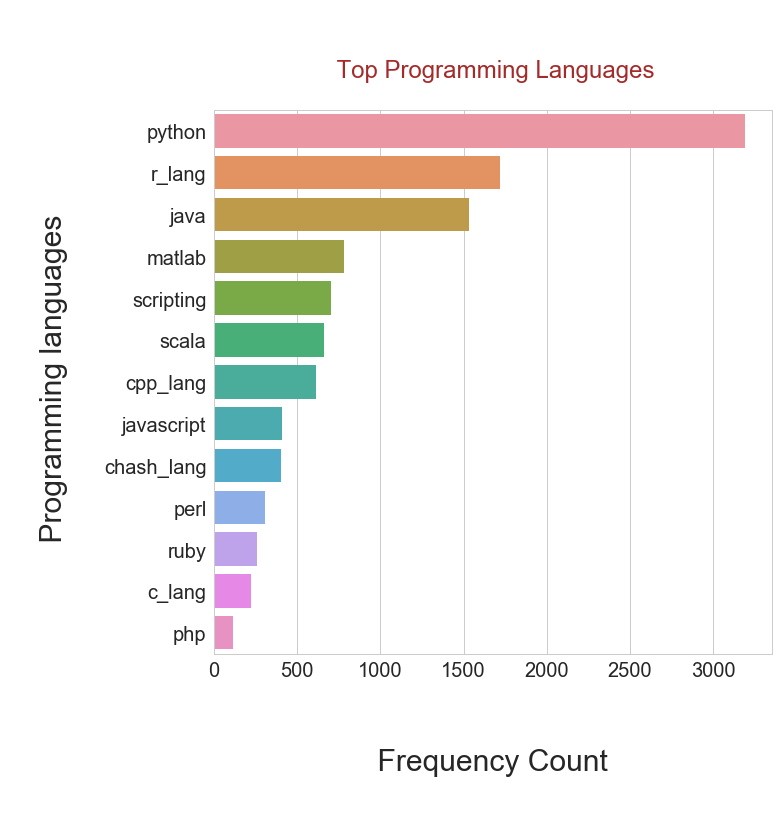

In [20]:


#drop any duplicate rows:
indeed_data1 = indeed_data.drop_duplicates()
indeed_data1.reset_index(drop=True, inplace=True)
indeed_data1.shape
print(len(indeed_data1))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


data = indeed_data1.copy() 


x_train = data["tech skills"].values.astype('U') #x_train contains the technical skill for each job posting
cv = CountVectorizer(stop_words='english', min_df = 0.00) 



matrix = cv.fit_transform(x_train) #fit count vectorizer to x_train
feature = cv.get_feature_names() #get the name of the technical skill after countervectorizer was fitted

frequency =  matrix.sum(axis=0) #frequency of each techincal skill, example, frequency of the words 'python', 'java' etc
freq = np.array(frequency).reshape(-1,) 
#print(freq)
freqs = zip(feature, freq)    # zip techincal skill with coresponding frequency

x_sort = []
y_sort=[]
feature_freq = sorted(freqs, key=lambda x: -x[1]) 
for x, y in feature_freq: #sort features and frequency 
    x_sort.append(x)
    y_sort.append(y)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# Plotting Style
#our technical skills contains many info, e.g 'excel' , 'hadoop' etc. We only want the programming the top programming language 
#Hence we create a list with only the names of the programming lanagues
bag_of_programming_languages = ['c_lang', 'cpp_lang', 'chash_lang', 'objective_c', 'java', 'python', 'php', 'javascript', 'visual_basic', 'delphi'
                               'perl', 'ruby', 'swift', 'go', 'r_lang', 'matlab', 'octave', 'scratch', 'scala',
                                'scripting', 'perl']


x_programming = []
y_programming =[]

zip_all_skills = zip(x_sort, y_sort) #contains all technical skills and corresponding frequencies 

for x,y in zip_all_skills: 
    
    if x in bag_of_programming_languages: #if technical skills in the bag of programming languages 
        x_programming.append(x) #append techincal skills
        y_programming.append(y)
        
sns.set(style="whitegrid", color_codes=True, font_scale =2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# Barplot of the Political Parties 

sns.barplot(y_programming,x_programming)

#Axes Labelling

plt.ylabel('\n Programming languages\n', fontsize=30)
plt.xlabel('\n\n Frequency Count \n', fontsize=30)
plt.title('\n\n Top Programming Languages\n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()




## b) Top Data Science Components
We analyse our data that was scraped from indeed.ca and indeed.com (USA) which contains information such as job title, company name , techincal skills etc. 

We use countvectorizer to obtain the frequency of data science components 

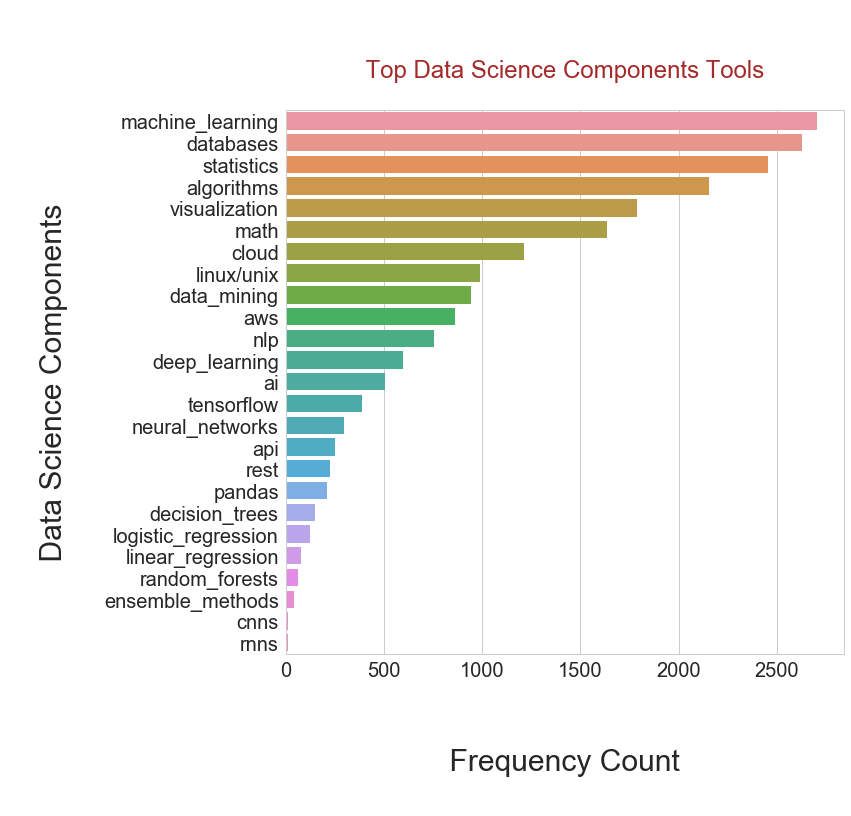

In [21]:
#analysis
#our technical skills contains many info, e.g 'excel' , 'hadoop' etc. We only want the data science components 
#Hence we create a list with only the names of data science components
l =[ 'logistic_regression', 'decision_trees', 'random_forests' ,'tensorflow', 'amazon_web_services', 'neural_networks',
    'ensemble_methods', 'svms' 'gradient_boosted_machines', 'cnns', 'rnns', 'evolutionary_approaches',
     'markov_logic_networks', 'awk', 'algorithms', 'linear_regression', 'statistics', 'cloud', 'aws', 'machine_learning',
   'deep_learning', 'visualization', 'data_mining', 'artificial_intelligence','data_visualization','databases', 'database', 'unix',
   'mathematics', 'natural_language_processing', 'nlp', 'pandas', 'linux', 'api','rest', 'algorithm']
x_l = []
y_l =[]

zip_all_skills = zip(x_sort, y_sort) #x_sort contains all the techical skills, e.g 'excel', 'hadoop' etc

for x,y in zip_all_skills:
    
    if x in l:
        x_l.append(x) #extract only data science components
        y_l.append(y) #extract frequency of data science components
        


#we have some data science components repeated. e.g 'database' and 'databases'


## Synonyms to be combined.
## First item in list is what every subsequent item will be renamed to
synonyms = [
    ['aws','amazon_web_services'],
    ['linux/unix','linux','unix'],
    ['nlp','natural_language_processing'],
    ['api','apis'],
    ['databases','database'],
    ['math','mathematics','maths'],
    ['visualization','data_visualization'],
    ['algorithms','algorithm'],
    ['ai','artificial_intelligence'],
]

def combine_synonyms(x_names,y_freqs):
    #Holds the frequencies of words (key:value) = (word:count)
    combined = {}

    for old_name,old_freq in zip(x_names,y_freqs):
        added = False
        for syn_list in synonyms:
            syn_title = syn_list[0]
            if old_name in syn_list:
                old_count = combined.get(syn_title,0) #Get the count of the synonym. If it's not in combined, return a 0
                new_count = old_count + old_freq
                combined[syn_title] = new_count # (key:value) = (word:count)
                added = True

        #If no synonyms were found, then add the item
        if not added:
            combined[old_name] = old_freq

    #convert to a list, and sort it 
    x = list(combined.keys())
    y = list(combined.values())
    inds = np.argsort(y)[::-1] #sort in descending order
    y = np.array(y)[inds].tolist()
    x = np.array(x)[inds].tolist()

    return x,y


x_l, y_l = combine_synonyms(x_l,y_l)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)


sns.barplot(y_l,x_l)

#Axes Labelling

plt.ylabel('\n Data Science Components \n', fontsize=30)
plt.xlabel('\n\n Frequency Count \n', fontsize=30
          )
plt.title('\n\n Top Data Science Components Tools \n', color='Brown')
plt.figure(figsize=(200,15))
#Display Plot

plt.show()



## c) Top Analysis Tools
We analyse our data that was scraped from indeed.ca and indeed.com (USA) which contains information such as job title, company name , techincal skills etc. 

We use countvectorizer to obtain the frequency of Top Analysis Tools 

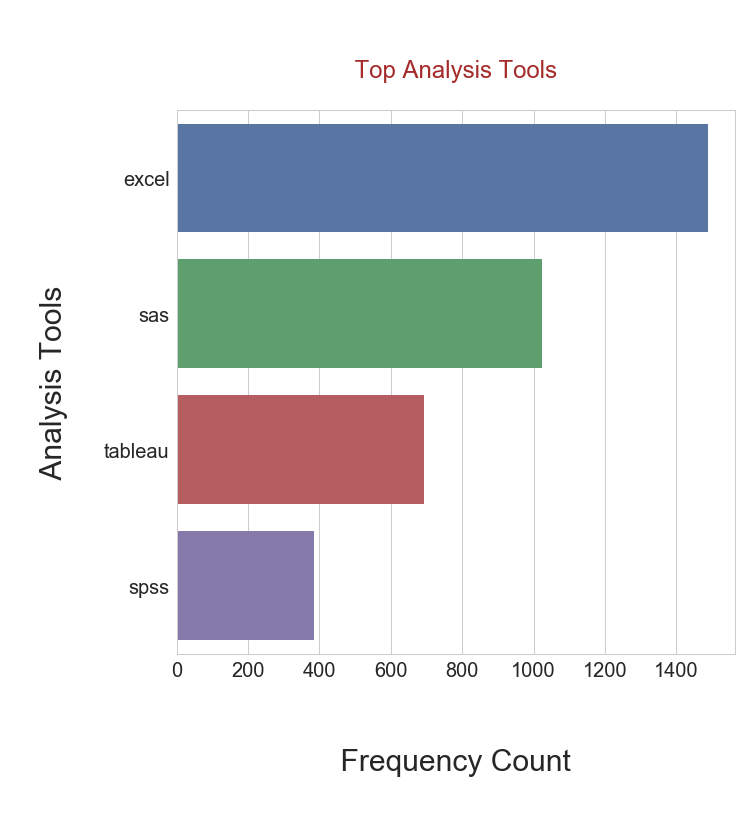

In [22]:
#analysis
#analysis
#our technical skills contains many info, e.g 'excel' , 'hadoop' etc. We only want the top analysis tools 
#Hence we create a list with only the names of top analysis tools
analysis_tool = ['excel','tableau', 'd3.js', 'sas', 'spss', 'd3', 'spotfire'] 
x_analysis = []
y_analysis =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in analysis_tool:
        x_analysis.append(x)
        y_analysis.append(y)
        
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# Barplot of the Political Parties 

sns.barplot(y_analysis,x_analysis)

#Axes Labelling

plt.ylabel('\n Analysis Tools \n', fontsize=30)
plt.xlabel('\n\n Frequency Count \n', fontsize=30)
plt.title('\n\n Top Analysis Tools \n', color='Brown')
plt.figure(figsize=(200,15))
#Display Plot

plt.show()



# Top Big Data Tools 
We analyse our data that was scraped from indeed.ca and indeed.com (USA) which contains information such as job title, company name , techincal skills etc. 

We use countvectorizer to obtain the frequency of Top Big Data Tools 

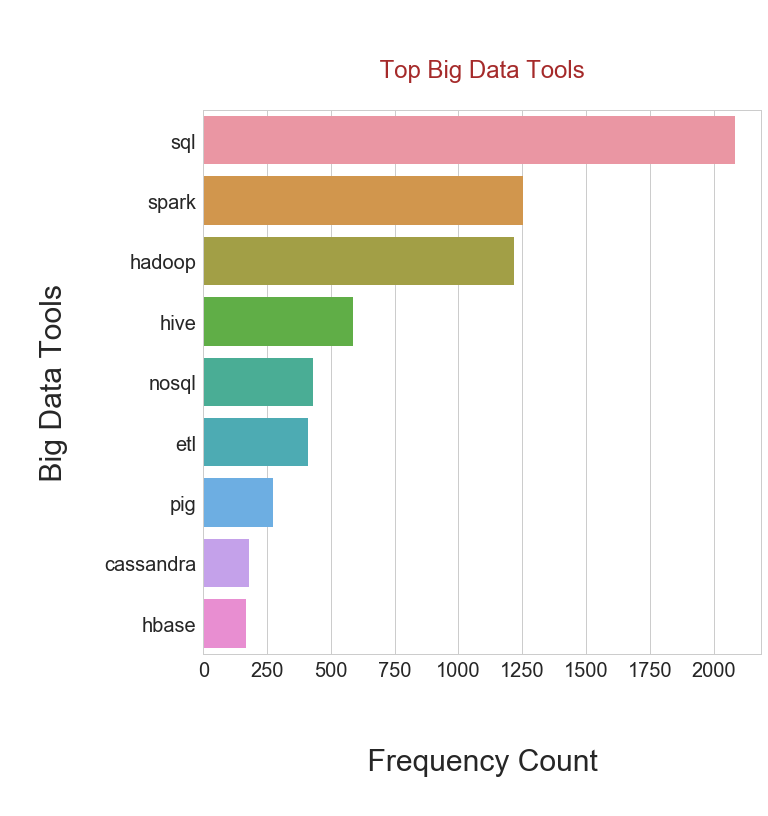

In [23]:
#analysis
#our technical skills contains many info, e.g 'excel' , 'hadoop' etc. We only want the top analysis tools 
#Hence we create a list with only the names of top big data tools
big_data = ['hadoop', 'mapreduce'
                'spark', 'pig',
                'hive', 'shark'
                'oozie', 'zookeeper',
                'flume', 'mahout', 'spark','sql', 'nosql', 'hbase', 'cassandra', 'etl']

#big_data

x_big_data = []
y_big_data =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in big_data:
        x_big_data.append(x)
        y_big_data.append(y)
        
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# Barplot of the Political Parties 

sns.barplot(y_big_data,x_big_data)

#Axes Labelling

plt.ylabel('\n Big Data Tools \n', fontsize=30)
plt.xlabel('\n\n Frequency Count \n', fontsize=30)
plt.title('\n\n Top Big Data Tools \n', color='Brown')
plt.figure(figsize=(200,15))
#Display Plot

plt.show()

# Other Top Skills
We analyse our data that was scraped from indeed.ca and indeed.com (USA) which contains information such as job title, company name , techincal skills etc. 

We use countvectorizer to obtain the frequency of Other Top Skills 

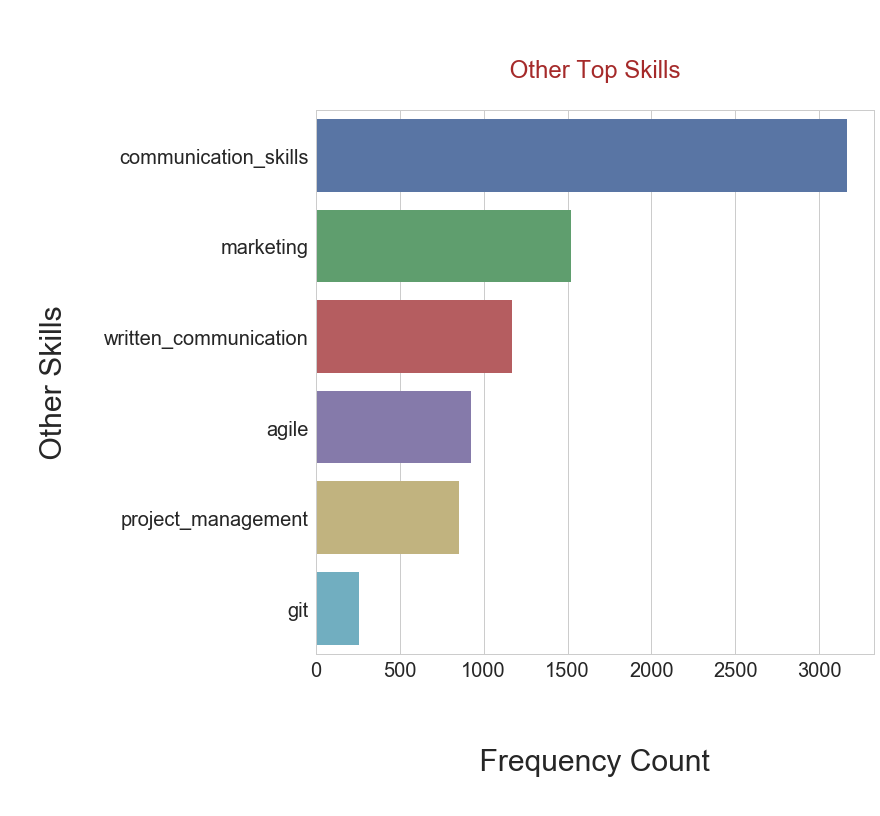

In [24]:
#analysis
other_skills = ['agile', 'git', 'communication_skills', 'project_management', 'marketing', 'written_communication']
x_l = []
y_l =[]

zip_all_skills = zip(x_sort, y_sort)

for x,y in zip_all_skills:
    
    if x in other_skills:
        x_l.append(x)
        y_l.append(y)
        
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# Barplot of the Political Parties 

sns.barplot(y_l,x_l)

#Axes Labelling

plt.ylabel('\n Other Skills \n', fontsize=30)
plt.xlabel('\n\n Frequency Count \n', fontsize=30)
plt.title('\n\n Other Top Skills \n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()
    

# Analysis of Data Science Salary

Out of our 8994 unique job posting, only 715 have salary info available. We analyze the salary data for the 715 job posting <br>

Before analyzing the salary, we need to clean the data futher: <br>
- clean the salary data by removing things like "Indeed est.", '$', ',' 
- have consistent units for the salary info , e.g dollars per year instead of dollars per hour etc


In [25]:
data = pd.read_csv('all_usa_and_canada.csv',index_col=0) #full data set, not all are unique


data.shape
#dropping any duplicate rows:
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data.shape
#clean salary data
data['Salary'] = data['Salary'].str.replace('(Indeed est.)','') #remove "Indeed.est"
data['Salary'] = data['Salary'].str.replace('(','')
data['Salary'] = data['Salary'].str.replace(')','')

data.head()


,City,Job title,Company name,Location,Salary,tech skills
0,Toronto,Machine Learning Developer / Data Scientist,Rangle,"Toronto, ON",no salary info,python data machine design machine_learning ac...
1,Toronto,Data Scientist - Customer Insights,TELUS Communications,"Toronto, ON",no salary info,modelling python data text_analytics machine d...
2,Toronto,"Research Scientist, Google Brain (Canada)",Google,"Toronto, ON",no salary info,python data machine cpp_lang research design c...
3,Toronto,"Data Scientist, HS Classification",Amazon.com,"Toronto, ON",no salary info,data_analyst data business_analyst statistical...
4,Toronto,Data Scientist,Wysdom.AI,"Toronto, ON",no salary info,modelling python data machine research decisio...


In [26]:
data['Salary'] = data['Salary'].str.replace('$','')
data['Salary'] = data['Salary'].str.replace(',','')
data['og_salary_period'] = np.nan #create a column called 'og_salary_period'

In [27]:
#if the salary contains information on time period, save that time
#period string in the og_salary_period column
data.loc[data['Salary'].str.contains('year'), 'og_salary_period'] = 'year'
data.loc[data['Salary'].str.contains('month'), 'og_salary_period'] = 'month'
data.loc[data['Salary'].str.contains('week'), 'og_salary_period'] = 'week'
data.loc[data['Salary'].str.contains('day'), 'og_salary_period'] = 'day'
data.loc[data['Salary'].str.contains('hour'), 'og_salary_period'] = 'hour'

data.tail()

,City,Job title,Company name,Location,Salary,tech skills,og_salary_period
8989,Dallas,Staff Software Engineer / Web Visualizations /...,Lockheed Martin,"Grand Prairie, TX 75051",no salary info,erp design data_visualization ruby programming...,NaN
8990,Dallas,Heavy Construction Manager,NOKIA,"Irving, TX",no salary info,data cloud documentation database tools large ...,NaN
8991,Dallas,Sales Engineer,Cognitive Scale,"Dallas, TX",no salary info,analytical communication_skills data presales ...,NaN
8992,Dallas,Full-Stack Software Engineer (Predictive Analy...,Workbridge Associates,"Dallas, TX",95000 - 120000 a year,mongodb modeling risk_management design algori...,year
8993,Dallas,Accelerator Consultant I - Automotive Software...,CDK Global,"Dallas, TX",no salary info,advertising consulting operations predictive u...,NaN


In [28]:
#filtering out the results with salary data != “no salary info
salary_data = data[data['Salary'] != 'no salary info']

#removing all rows in 'salary data' from 'data', and converting #all “no salary info” values to NaN, so that float salary values can #be easily reintegrated later
data = data[~data.isin(salary_data)].dropna(how='all')
data['Salary'].replace('no salary info',np.nan, inplace=True)
data['Salary'].astype('float')
print(len(data)) #number of job postings that do have have no salary info

8279


In [29]:
#separating out data based on whether contains hour, day, week, #month, year
year_salaries = salary_data[salary_data['Salary'].str.contains('year')]
month_salaries = salary_data[salary_data['Salary'].str.contains('month')]
week_salaries = salary_data[salary_data['Salary'].str.contains('week')]
day_salaries = salary_data[salary_data['Salary'].str.contains('day')]
hour_salaries = salary_data[salary_data['Salary'].str.contains('hour')]

In [30]:
# removing string values(“ a year”, “ a week”, etc. from salary dfs)
year_salaries['Salary'] = year_salaries['Salary'].str.replace(' a year', '')
month_salaries['Salary'] = month_salaries['Salary'].str.replace(' a month', '')
week_salaries['Salary'] = week_salaries['Salary'].str.replace(' a week', '')
day_salaries['Salary'] = day_salaries['Salary'].str.replace(' a day', '')
hour_salaries['Salary'] = hour_salaries['Salary'].str.replace(' an hour', '')

C:\Users\chezza\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\chezza\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chezza\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [31]:
#converting the salary to per year
def split_sal(i):
    try:
        splt = i.split(' - ',1)
        first = float(splt[0])
        second = float(splt[1])
        return (first + second)/2
    except:
        return float(i)
    
year_salaries['Salary'] = year_salaries['Salary'].apply(split_sal)
month_salaries['Salary'] = month_salaries['Salary'].apply(split_sal)
month_salaries['Salary'] = month_salaries['Salary'] * 12
week_salaries['Salary'] = week_salaries['Salary'].apply(split_sal)
week_salaries['Salary'] = week_salaries['Salary'] * 52
day_salaries['Salary'] = day_salaries['Salary'].apply(split_sal)
day_salaries['Salary'] = day_salaries['Salary'] * 260
hour_salaries['Salary'] = hour_salaries['Salary'].apply(split_sal)
hour_salaries['Salary'] = hour_salaries['Salary'] * 2080

C:\Users\chezza\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chezza\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\chezza\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [32]:
#rejoining salary data into main dataframe
combined_salaries = pd.concat([year_salaries, month_salaries, week_salaries, day_salaries, hour_salaries], axis=0)
data = pd.concat([data, combined_salaries], axis=0)

In [33]:
#categorize salary info
def categorize_sal(i):
    if i <= 50000.0:
        return ('<=50k')
    elif i >50000.0 and i <= 100000:
        return ('>50k')
    elif i > 100000.0:
        return ('>100k')
    else:
        return ('no category')

In [34]:
data['salary_category'] = data['Salary'].apply(categorize_sal)
data.head()

print(len(data))


8994


In [35]:
data.to_csv('indeed_data_salary.csv', encoding='utf8')

### Convert USD to CAD
Convert all USD to CAD 

In [36]:
d = pd.read_csv('indeed_data_salary.csv')
#d = d[np.logical_not(np.isnan(d['Salary']))] #keep entries with nonzero (loaded as NaN) salary information only

without_salary  = np.isnan(d['Salary'])
with_salary     = np.logical_not(without_salary)


#d[without_salary].to_csv('indeed_no_salaries.csv')

#d = d[with_salary] #keep entries with nonzero (loaded as NaN) salary information only

can_provs = ('BC','AB','MB','NB','NL','NS','NT','NU','ON','PE','QC','SK','YT')
ex_rate = 1.31038 #from xe.com on 18 March 2018

for i in range(d.shape[0]):
    us = False
    state_prov = d.iloc[i,:]['Location'].split(',')
    
    #First, deal with the exceptions
    #add more special cases here as necessary
    if len(state_prov) < 2:
        if 'new york' in d.iloc[i,:]['Location'].lower():
            state_prov = ['','NY'] #put this into the expected form for state_prov

    state_prov = state_prov[1].strip()
    if len(state_prov) < 2:
        print(d.iloc[i,:])
        print(state_prov)
        raise Exception('The above row is not dealt with properly. Add an exception in the salary converion function')
    state_prov = state_prov[0:2]
    if state_prov not in can_provs:
        #we have a US state -- need to convert salary into Canadian
        # print('%s,%s in US' % (d.iloc[i,:]['City'],state_prov)) #debug
        d.loc[d.index[i],'Salary']*=ex_rate

d.to_csv('indeed_data_salaries_in_CAD.csv', encoding='utf8')
#print(len(d))
#print(with_salary)

In [37]:

#what is the median salary? 
print("salary median: " + str(d["Salary"].median()))
#print("salary mean: " + str(d["Salary"].mean()))
#creating new target variable "above_med_sal" where 0 == below or equal to the median, and 1 == above the median; any postings without salary information will have NaN values for this variable
d["above_med_sal"] = np.nan
d.loc[d["Salary"] > d["Salary"].median(), "above_med_sal"] = 1
d.loc[d["Salary"] <= d["Salary"].median(), "above_med_sal"] = 0
d.tail()


salary median: 124486.1


,Unnamed: 0,City,Job title,Company name,Location,Salary,tech skills,og_salary_period,salary_category,above_med_sal
8989,8369,Los+Angeles,Environmental Scientist (On-Call),Lutech Resources,"Los Angeles, CA",74953.736000,evaluation writing_skills data,hour,>50k,0.0
8990,8407,Los+Angeles,Social Media Analyst,Fama,"Santa Monica, CA 90404",39521.060800,technology social_media quality_assurance data...,hour,<=50k,0.0
8991,8446,Los+Angeles,Machine Shop Technician/Apprentice,"RadiaBeam Technologies, LLC","Santa Monica, CA 90404",43609.446400,manufacturing_operations data health testing c...,hour,<=50k,0.0
8992,8450,Los+Angeles,Research Lab Tech III,USC,"Los Angeles, CA",69516.183152,communication_skills research data health data...,hour,>50k,0.0
8993,8485,Los+Angeles,Machine Learning Engineer & Researcher,Payette Group,"Los Angeles, CA",324345.257600,python technology go data cpp_lang health comp...,hour,>100k,1.0


Text(0.5,1,'Indeed Salary Distribution with Median (red)')

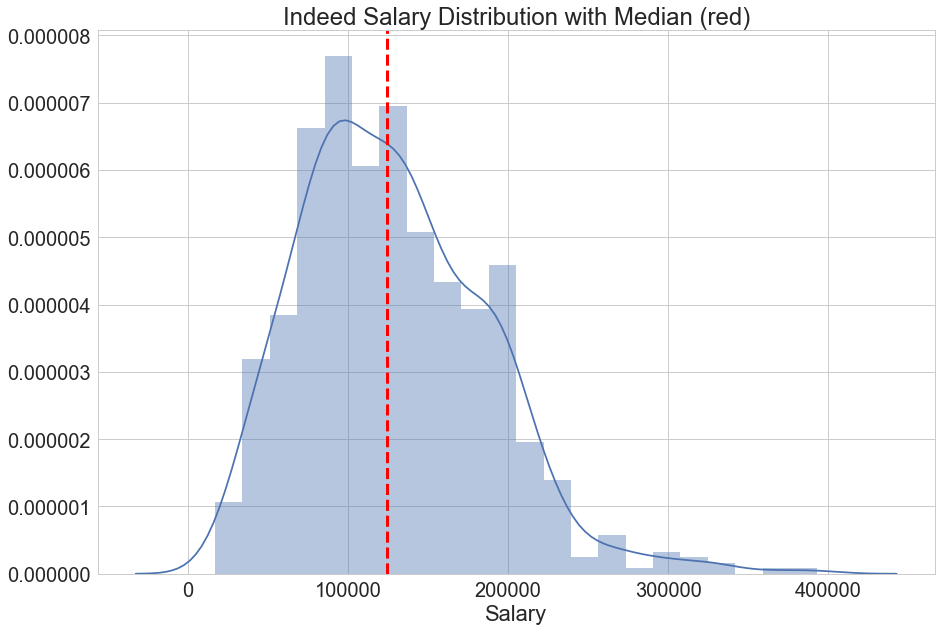

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10
sal_plot = d[d["Salary"].notnull()]
ax = sns.distplot(sal_plot["Salary"])
ax.axvline(sal_plot["Salary"].median(), lw=3, ls='dashed', color='red')
#ax.axvline(sal_plot["Salary"].mean(), lw=2.5, ls='dashed', color='red')
plt.title('Indeed Salary Distribution with Median (red)')

# Top skills based on income

We check the top skills based on income for for approximately 600 jobs with salary info

In [39]:
#clean data abit more
#create a big_bag of words containing all the skills that we plotted in the steps above
d.head()
big_bag = ['c_lang', 'cpp_lang', 'chash_lang', 'objective_c', 'java', 'python', 'php', 'javascript', 'visual_basic', 'delphi'
                               'perl', 'ruby', 'swift', 'assembly_language', 'go', 'r_lang', 'matlab', 'octave', 'scratch', 'scala',
                                'scripting', 'perl', 'shell_scripting' ,'logistic_regression', 'decision_trees', 'random_forests' ,'tensorflow', 'amazon_web_services', 'neural_networks',
    'bayesian_techniques', 'ensemble_methods', 'svms' 'gradient_boosted_machines', 'cnns', 'rnns', 'evolutionary_approaches',
    'hmms', 'markov_logic_networks', 'gan', 'awk', 'algorithms', 'linear_regression', 'statistics', 'cloud', 'aws', 'machine_learning',
   'deep_learning', 'visualization', 'data_mining', 'artificial_intelligence','data_visualization','databases', 'database', 'unix',
   'mathematics', 'natural_language_processing', 'nlp', 'pandas', 'linux', 'api','rest', 'algorithm','excel','tableau',
    'd3.js', 'sas', 'spss', 'd3', 'spotfire','hadoop', 'mapreduce','spark', 'pig','hive', 'shark','oozie', 'zookeeper',
                'flume', 'mahout', 'spark','sql', 'nosql', 'hbase', 'cassandra', 'etl','agile', 'git', 'communication_skills', 'project_management', 'marketing', 'written_communication']

In [40]:
#only extract skills that were plotted in earlier graphs, i.e top programming languages, top big data tools etc
def filter_skill(tech_skill):
    
    if type(tech_skill) == float:
        new_text =''
    else:
        tech = tech_skill.split(' ')

        
        filtered_sentence = [w for w in tech if w in big_bag] #if text_token is not in stop_words, keep text_token
        new_text = ' '.join(filtered_sentence) 
    
    return new_text
    
def filter_all_skills(data):
    data_copy = data.copy()
    #applies filter_skill function to all job postings to extract tech skills for each posting
    #['technical skills"] column will only show tech skills which were plotted in steps above]
    data_copy['technical skills'] = data_copy['tech skills'].apply(filter_skill) 
    return data_copy

d = filter_all_skills(d)

d.to_csv('indeed_data_salaries_in_CAD_filtered.csv', encoding='utf8')

In [41]:
salary_data = d[d.above_med_sal.notnull()]
#print(salary_data.head())


#splitting out our predictor variables from the salary data
sal_X = salary_data.iloc[:,0:len(salary_data.columns)]
#print(len(sal_X))
#sal_y will be above_med_sal, creating as a dataframe
sal_y = pd.DataFrame(salary_data["above_med_sal"])


salary_data.head()


,Unnamed: 0,City,Job title,Company name,Location,Salary,tech skills,og_salary_period,salary_category,above_med_sal,technical skills
8279,46,Toronto,Senior Information Technology Business Consult...,Iris Software,"Toronto, ON",105000.0,modelling python data risk_management retail l...,year,>100k,0.0,python hbase machine_learning hadoop hive math...
8280,61,Toronto,Weston Family Senior Scientist,Nature Conservancy Canada,"Toronto, ON",97000.0,data research selection_process marketing huma...,year,>50k,0.0,marketing
8281,107,Toronto,Lead Data Scientist (Fraud Detection),Jobspring Partners,"Toronto, ON",150000.0,python data statistical_modeling machine opera...,year,>100k,1.0,python machine_learning ensemble_methods api h...
8282,138,Toronto,Research Assistant ̵ Human Systems Interaction,Government of Canada,"Downsview, ON",56261.0,data technology research design selection_proc...,year,>50k,0.0,statistics excel spss mathematics sas
8283,146,Toronto,Information Technology - Business Consultants,Iris Software,"Toronto, ON",90000.0,modelling python data risk_management retail l...,year,>50k,0.0,python hbase java machine_learning hadoop hive...


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df = .05)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.2, stratify=sal_y, random_state=74)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#print(X_train)
cvec.fit(X_train["technical skills"])
#transforming job_title data into job_train
job_train = pd.DataFrame(cvec.transform(X_train["technical skills"]).todense(),
                       columns=cvec.get_feature_names())
word_observe = pd.concat([job_train, y_train], axis=1)
word_observe.tail()

,agile,algorithms,aws,c_lang,cloud,communication_skills,cpp_lang,data_mining,data_visualization,database,...,sas,scala,spark,spss,sql,statistics,tableau,visualization,written_communication,above_med_sal
567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
569,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
570,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1.0
571,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0.0


In [43]:
#Observing most common technical skill for both above and below median salaries
for i in range(2):
    
     
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    #print(i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
   


### Top Skills in terms of Salary 


In [44]:
#creating separate lists of the top appearing words so that these can be combined and compared to create ratios of appearances in above-median vs. below-median salaries
word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0) #top skills for below median salary
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0) #top skills for above median salary
#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T
#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]
word_count_compare.above_below_ratio.sort_values(ascending=False)
#word_count_compare.plot.bar()


above_med_sal                  inf
scala                    18.500000
deep_learning             9.333333
nosql                     9.000000
hadoop                    8.500000
cloud                     8.333333
aws                       6.875000
spark                     6.777778
java                      4.933333
c_lang                    4.333333
data_mining               2.777778
python                    2.611111
machine_learning          2.384615
linux                     2.250000
algorithms                2.205882
agile                     2.058824
javascript                2.000000
tableau                   1.846154
cpp_lang                  1.750000
r_lang                    1.666667
sql                       1.423077
written_communication     1.307692
mathematics               1.250000
marketing                 1.222222
statistics                1.147541
visualization             1.071429
data_visualization        0.947368
sas                       0.944444
databases           

# Algorithms 

## a) Logistic regression : predict salary based on skillset


In [45]:
(len(d))


8994

In [46]:
salary_data = d[d.above_med_sal.notnull()]
#print(salary_data.head())
print(len(salary_data))
going_to_be = d[d.above_med_sal.isnull()]
print(len(going_to_be))

#splitting out our predictor variables from the salary data
sal_X = salary_data.iloc[:,0:len(salary_data.columns)]
going_to_be_predicted_X = going_to_be.iloc[:,0:len(going_to_be.columns)]
#print(len(sal_X))
#sal_y will be above_med_sal, creating as a dataframe
sal_y = pd.DataFrame(salary_data["above_med_sal"])
going_to_be_predicted_y = pd.DataFrame(salary_data["above_med_sal"])

#print(sal_X)
salary_data.head()
#len 715

715
8279


,Unnamed: 0,City,Job title,Company name,Location,Salary,tech skills,og_salary_period,salary_category,above_med_sal,technical skills
8279,46,Toronto,Senior Information Technology Business Consult...,Iris Software,"Toronto, ON",105000.0,modelling python data risk_management retail l...,year,>100k,0.0,python hbase machine_learning hadoop hive math...
8280,61,Toronto,Weston Family Senior Scientist,Nature Conservancy Canada,"Toronto, ON",97000.0,data research selection_process marketing huma...,year,>50k,0.0,marketing
8281,107,Toronto,Lead Data Scientist (Fraud Detection),Jobspring Partners,"Toronto, ON",150000.0,python data statistical_modeling machine opera...,year,>100k,1.0,python machine_learning ensemble_methods api h...
8282,138,Toronto,Research Assistant ̵ Human Systems Interaction,Government of Canada,"Downsview, ON",56261.0,data technology research design selection_proc...,year,>50k,0.0,statistics excel spss mathematics sas
8283,146,Toronto,Information Technology - Business Consultants,Iris Software,"Toronto, ON",90000.0,modelling python data risk_management retail l...,year,>50k,0.0,python hbase java machine_learning hadoop hive...


# check technical skills associated with jobs more than median (1) and less than median (0)

In [47]:
#Train Validation set 
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)
from sklearn.model_selection import train_test_split
sal_y = pd.DataFrame(salary_data["above_med_sal"])
sal_y = pd.DataFrame.as_matrix(sal_y).ravel()

cvec.fit(sal_X["technical skills"])
#transforming job_title data into job_train
skill = pd.DataFrame(cvec.transform(sal_X["technical skills"]).todense(),
                       columns=cvec.get_feature_names())
print('skill_fea_nm=', cvec.get_feature_names())
#fitting count vectorizer to job title
cvec.fit(sal_X["Job title"])
#transforming job_title data into job_train
job = pd.DataFrame(cvec.transform(sal_X["Job title"]).todense(),
                       columns=cvec.get_feature_names())
print('job_fea_nm=', cvec.get_feature_names())
#fitting count vectorizer to city
cvec.fit(sal_X["City"])
#transforming job_title data into job_train
city = pd.DataFrame(cvec.transform(sal_X["City"]).todense(),
                       columns=cvec.get_feature_names())
print('city_fea_nm=', cvec.get_feature_names())
skill_tr, skill_ts, y_tr1, y_ts1 = train_test_split(skill, sal_y, test_size=0.2, stratify=sal_y, random_state=46)
skill_tr.reset_index(drop=True, inplace=True)
skill_ts.reset_index(drop=True, inplace=True)

job_tr, job_ts, y_tr2, y_ts2 = train_test_split(job, sal_y, test_size=0.2, stratify=sal_y, random_state=46)
job_tr.reset_index(drop=True, inplace=True)
job_ts.reset_index(drop=True, inplace=True)

city_tr, city_ts, y_tr3, y_ts3 = train_test_split(city, sal_y, test_size=0.2, stratify=sal_y, random_state=46)
city_tr.reset_index(drop=True, inplace=True)
city_ts.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)
#y_test.reset_index(drop=True, inplace=True)
print('sal_len=',sal_X.shape)
print('skill_len',skill.shape)
print('job_len',job.shape)
print('city_len',city.shape)
print("\n")
print('skill_tr_len',skill_tr.shape)
print('skill_ts_len',skill_ts.shape)
print('job_tr_len',job_tr.shape)
print('job_ts_len',job_ts.shape)
print('city_tr_len',city_tr.shape)
print('city_ts_len',city_ts.shape)

skill_fea_nm= ['agile', 'algorithms', 'aws', 'c_lang', 'cloud', 'communication_skills', 'cpp_lang', 'data_mining', 'data_visualization', 'database', 'databases', 'deep_learning', 'excel', 'hadoop', 'java', 'javascript', 'linux', 'machine_learning', 'marketing', 'mathematics', 'matlab', 'nosql', 'project_management', 'python', 'python sql', 'r_lang', 'sas', 'scala', 'spark', 'spss', 'sql', 'statistics', 'tableau', 'visualization', 'written_communication']
job_fea_nm= ['analyst', 'data', 'data scientist', 'developer', 'engineer', 'research', 'research analyst', 'scientist', 'senior', 'software', 'software engineer']
city_fea_nm= ['austin', 'boulder', 'chicago', 'dc', 'francisco', 'new', 'new york', 'san', 'san francisco', 'washington', 'washington dc', 'york']
sal_len= (715, 11)
skill_len (715, 35)
job_len (715, 11)
city_len (715, 12)


skill_tr_len (572, 35)
skill_ts_len (143, 35)
job_tr_len (572, 11)
job_ts_len (143, 11)
city_tr_len (572, 12)
city_ts_len (143, 12)


In [48]:
#Preparing for predicting
cvec.fit(going_to_be_predicted_X["technical skills"])
#transforming job_title data into job_train
un_skill = pd.DataFrame(cvec.transform(going_to_be_predicted_X["technical skills"]).todense(),
                       columns=cvec.get_feature_names())
un_skill_fea = cvec.get_feature_names()
print('skill_fea_nm=', cvec.get_feature_names())
#fitting count vectorizer to job title
cvec.fit(going_to_be_predicted_X["Job title"])
#transforming job_title data into job_train
un_job = pd.DataFrame(cvec.transform(going_to_be_predicted_X["Job title"]).todense(),
                       columns=cvec.get_feature_names())
print('job_fea_nm=', cvec.get_feature_names())
#fitting count vectorizer to city
cvec.fit(going_to_be_predicted_X["City"])
#transforming job_title data into job_train
un_city = pd.DataFrame(cvec.transform(going_to_be_predicted_X["City"]).todense(),
                       columns=cvec.get_feature_names())
print('city_fea_nm=', cvec.get_feature_names())
print('goingtopredicted_len=',going_to_be_predicted_X.shape)
print('unskill_len',un_skill.shape)   # can only use un_skill since un job and uncity are not same len as training set
print('unjob_len',un_job.shape)
print('uncity_len',un_city.shape)
un_skill.head()

skill_fea_nm= ['agile', 'algorithms', 'artificial_intelligence', 'aws', 'cloud', 'communication_skills', 'cpp_lang', 'data_mining', 'data_visualization', 'database', 'databases', 'deep_learning', 'excel', 'hadoop', 'hive', 'java', 'linux', 'machine_learning', 'marketing', 'mathematics', 'matlab', 'natural_language_processing', 'project_management', 'python', 'python sql', 'r_lang', 'sas', 'scala', 'scripting', 'spark', 'sql', 'statistics', 'tableau', 'visualization', 'written_communication']
job_fea_nm= ['analyst', 'data', 'data scientist', 'engineer', 'learning', 'machine', 'machine learning', 'manager', 'research', 'research analyst', 'scientist', 'senior', 'software']
city_fea_nm= ['angeles', 'chicago', 'dc', 'denver', 'francisco', 'los', 'los angeles', 'new', 'new york', 'philadelphia', 'san', 'san francisco', 'seattle', 'washington', 'washington dc', 'york']
goingtopredicted_len= (8279, 11)
unskill_len (8279, 35)
unjob_len (8279, 13)
uncity_len (8279, 16)


,agile,algorithms,artificial_intelligence,aws,cloud,communication_skills,cpp_lang,data_mining,data_visualization,database,...,r_lang,sas,scala,scripting,spark,sql,statistics,tableau,visualization,written_communication
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,1,1,0,0,0
2,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Score: 0.744755244755
Cross-validated scores: [ 0.6875      0.75        0.68421053  0.66315789  0.72631579  0.74736842]
Logistic Score: 0.706293706294
[[58 15]
 [27 43]]
             precision    recall  f1-score   support

  below_med       0.68      0.79      0.73        73
  above_med       0.74      0.61      0.67        70

avg / total       0.71      0.71      0.70       143

Linear Score: 0.706293706294
                   Feature_Name     Coeff
0                         agile  0.039834
1                    algorithms -0.023947
2       artificial_intelligence  0.099465
3                           aws  0.437225
4                         cloud  0.205551
5          communication_skills -0.142444
6                      cpp_lang -0.114986
7                   data_mining  0.163380
8            data_visualization -0.043481
9                      database -0.135600
10                    databases -0.025017
11                deep_learning  0.232532
12                        excel -0.18613

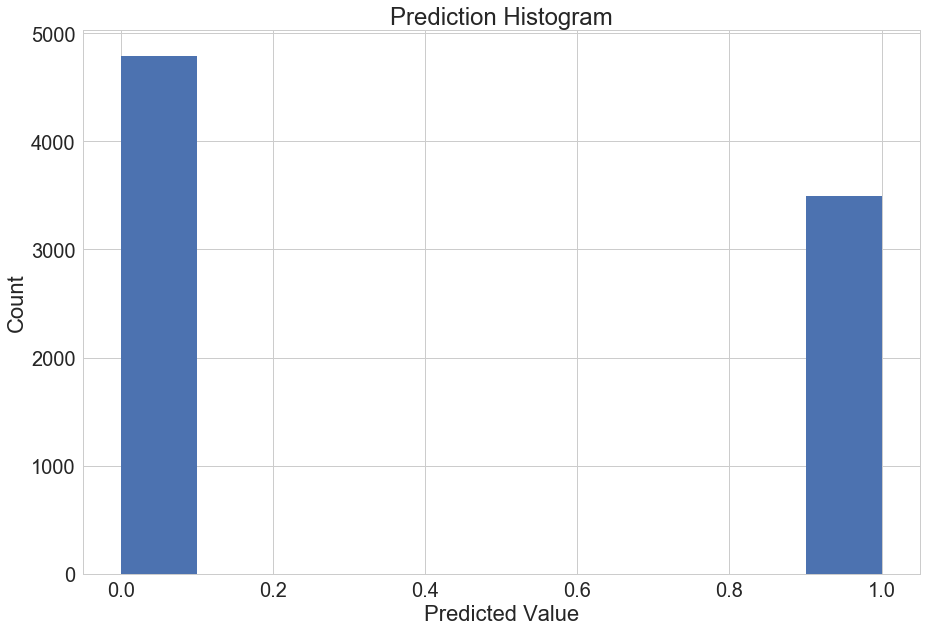

In [49]:
# Skill_tr and un_skill predict
from sklearn.feature_extraction.text import TfidfVectorizer
def vec_d(text_input):
     vectorizer = TfidfVectorizer()
     X = vectorizer.fit_transform(text_input)
     arr_x = X.toarray()
     feature = vectorizer.get_feature_names() 
     return arr_x,feature
#sk,fea = vec_d(X_train["technical skills"])
#now score a logistic regression on X_train and y_train using cross_val_scores
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

 
lr_skill = LogisticRegression()
lr_skill.fit(skill_tr, y_tr1)
print("Score:", lr_skill.score(skill_tr, y_tr1))     
scores = cross_val_score(lr_skill, skill_tr, y_tr1, cv=6)
print("Cross-validated scores:", scores)

# Predicting salaries in X_test given predictors developed with X_train
y_probs = lr_skill.predict(skill_ts)   
#generates predicted values of Y_test from X_test based off of training set.
print("Logistic Score:", lr_skill.score(skill_ts, y_ts1))
#Create classification and confusion matrix

# printing confusion matrix 
print(confusion_matrix(y_ts1, y_probs,))
#printing classification report
target_names = ['below_med', 'above_med']
print(classification_report(y_ts1, y_probs, target_names=target_names))
 
 
predicted_sal=lr_skill.predict(un_skill)
plt.hist(predicted_sal)
plt.title("Prediction Histogram")
plt.xlabel("Predicted Value")
plt.ylabel("Count")
fig = plt.gcf()
predicted_sal.astype(int)
np.savetxt("predicted_sal.csv", predicted_sal, delimiter=",")


ll = LinearRegression()
ll.fit(skill_tr, y_tr1)
y_probs = lr_skill.predict(skill_ts)   
#generates predicted values of Y_test from X_test based off of training set.
print("Linear Score:", lr_skill.score(skill_ts, y_ts1))
ll.predict(un_skill)
#print('Coeff',list(100*(ll.coef_.T/(sum(abs(ll.coef_))))))
type(un_skill_fea)
dataset = pd.DataFrame({'Feature_Name': un_skill_fea, 'Coeff': list(ll.coef_.T)}, columns=['Feature_Name', 'Coeff'])
print(dataset)
print(type(un_skill))
print(type(list(ll.coef_.T)))
print(type(predicted_sal))

In [50]:
dataset1 = pd.DataFrame({'sal': list(predicted_sal)}, columns=['sal'])
dataset1.head()
result = pd.concat([un_skill,dataset1],axis=1)
result.head()
word_observe=result
#Observing most common technical skill n-grams for both above and below median salaries
for i in range(2):
    
    word_count = word_observe[word_observe["sal"]==i].sum(axis=0)
    print(i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print(cw)



#creating separate lists of the top appearing words so that these can be combined and compared to create ratios of appearances in above-median vs. below-median salaries
word_count_below = word_observe[word_observe["sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["sal"]==1].sum(axis=0)
#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T
#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
#word_count_compare["sal"] = word_count_compare[1]/word_count_compare[0]
#word_count_compare.sort_values(ascending=False)

0 most common words
communication_skills     1996.0
excel                    1193.0
statistics                708.0
marketing                 699.0
database                  681.0
written_communication     593.0
databases                 572.0
project_management        568.0
sql                       496.0
python                    441.0
mathematics               439.0
r_lang                    361.0
machine_learning          360.0
visualization             355.0
algorithms                339.0
sas                       303.0
matlab                    284.0
agile                     245.0
data_visualization        203.0
cpp_lang                  166.0
dtype: float64
1 most common words
sal                     3491.0
python                  2499.0
machine_learning        2178.0
statistics              1578.0
sql                     1438.0
java                    1322.0
algorithms              1277.0
r_lang                  1242.0
hadoop                  1077.0
mathematics             10

## Clustering 

In [51]:
dataset = pd.read_csv("indeed_data_salaries_in_CAD_filtered.csv")
dataset.head()

,Unnamed: 0,Unnamed: 0.1,City,Job title,Company name,Location,Salary,tech skills,og_salary_period,salary_category,above_med_sal,technical skills
0,0,0,Toronto,Machine Learning Developer / Data Scientist,Rangle,"Toronto, ON",NaN,python data machine design machine_learning ac...,NaN,no category,NaN,python machine_learning artificial_intelligenc...
1,1,1,Toronto,Data Scientist - Customer Insights,TELUS Communications,"Toronto, ON",NaN,modelling python data text_analytics machine d...,NaN,no category,NaN,python r_lang marketing statistics machine_lea...
2,2,2,Toronto,"Research Scientist, Google Brain (Canada)",Google,"Toronto, ON",NaN,python data machine cpp_lang research design c...,NaN,no category,NaN,python cpp_lang machine_learning artificial_in...
3,3,3,Toronto,"Data Scientist, HS Classification",Amazon.com,"Toronto, ON",NaN,data_analyst data business_analyst statistical...,NaN,no category,NaN,statistics excel sql mathematics data_mining etl
4,4,4,Toronto,Data Scientist,Wysdom.AI,"Toronto, ON",NaN,modelling python data machine research decisio...,NaN,no category,NaN,python decision_trees logistic_regression mach...


In [52]:
dataset = dataset.drop('og_salary_period', 1)
dataset = dataset.drop('tech skills', 1)
dataset = dataset.drop('technical skills', 1)
dataset = dataset.drop('salary_category', 1)
dataset = dataset.drop('above_med_sal', 1)
dataset = dataset.drop('Unnamed: 0', 1)
dataset = dataset.drop('Unnamed: 0.1', 1)

In [53]:
dataset.head()

,City,Job title,Company name,Location,Salary
0,Toronto,Machine Learning Developer / Data Scientist,Rangle,"Toronto, ON",NaN
1,Toronto,Data Scientist - Customer Insights,TELUS Communications,"Toronto, ON",NaN
2,Toronto,"Research Scientist, Google Brain (Canada)",Google,"Toronto, ON",NaN
3,Toronto,"Data Scientist, HS Classification",Amazon.com,"Toronto, ON",NaN
4,Toronto,Data Scientist,Wysdom.AI,"Toronto, ON",NaN


In [54]:
new_data = dataset.dropna()
new_data.head()

,City,Job title,Company name,Location,Salary
8279,Toronto,Senior Information Technology Business Consult...,Iris Software,"Toronto, ON",105000.0
8280,Toronto,Weston Family Senior Scientist,Nature Conservancy Canada,"Toronto, ON",97000.0
8281,Toronto,Lead Data Scientist (Fraud Detection),Jobspring Partners,"Toronto, ON",150000.0
8282,Toronto,Research Assistant ̵ Human Systems Interaction,Government of Canada,"Downsview, ON",56261.0
8283,Toronto,Information Technology - Business Consultants,Iris Software,"Toronto, ON",90000.0


In [55]:
from sklearn.preprocessing import LabelEncoder
D = new_data.apply(LabelEncoder().fit_transform)
print(type(D))
print(D)

<class 'pandas.core.frame.DataFrame'>
      City  Job title  Company name  Location  Salary
8279    20        462           168       155     183
8280    20        589           220       155     153
8281    20        254           174       155     272
8282    20        389           138        47      51
8283    20        228           168       155     135
8284    20         11           342       155      16
8285    20         53           315       110       6
8286    20        590           133        50      54
8287    20        214           315       110      23
8288    21         19            14       159     274
8289    21        144           242       159      98
8290    21        491           325       159      64
8291    21        152           346       159     272
8292    21        449           113       109     188
8293    21        222             4       159      77
8294    21         62           241       159     188
8295    21        278           324       15

[[ 20 183]
 [ 20 153]
 [ 20 272]
 ..., 
 [ 10  25]
 [ 10  76]
 [ 10 360]]


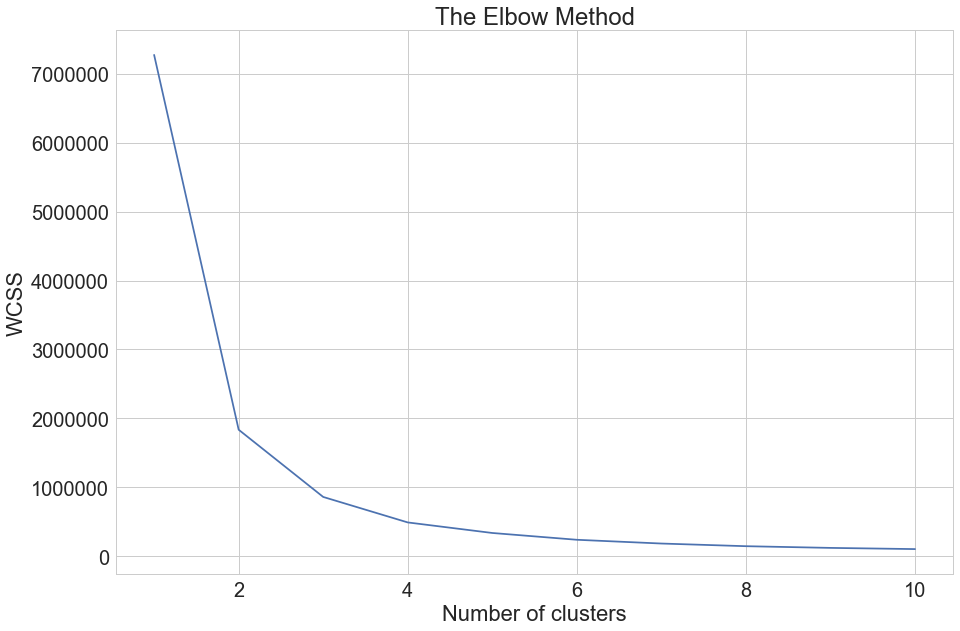

In [56]:
X = D.iloc[:, [0,4]].values
print(X)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

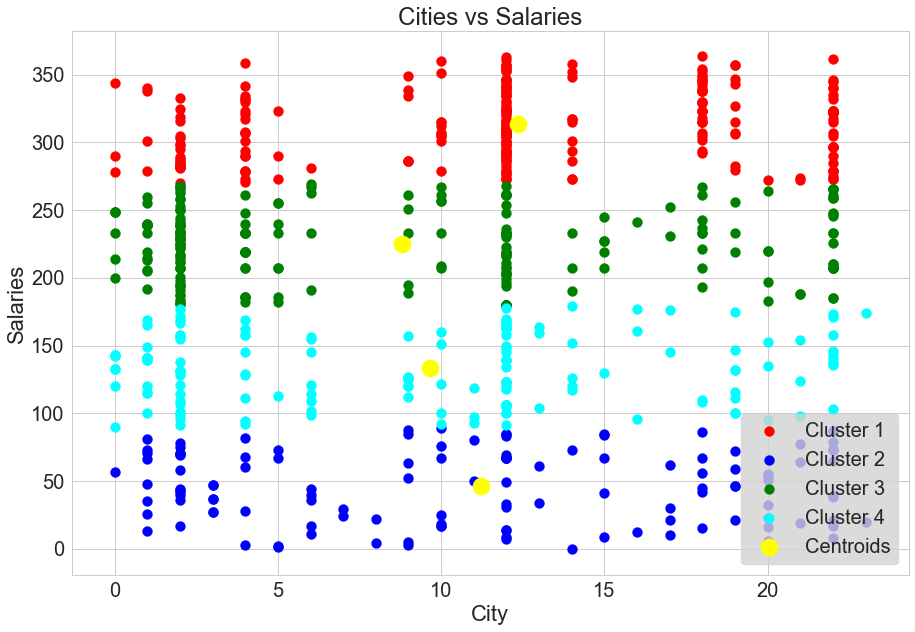

In [57]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cities vs Salaries')
plt.xlabel('City')
plt.ylabel('Salaries')

legend = plt.legend(frameon = 1, loc = 'best')

frame = legend.get_frame()
frame.set_facecolor('lightgray')


                
plt.show()


## Bag of Business words

To design a curriculum for a new professional "Master of Business and Management of Analytics and AI" program with business and soft skills focus :  We acquired a bag of business words by following the same procedure for as for technical skills. Instead of _data scientist_, we scrapped Naukri for _business manager_ job posting in order to acquire the top business skills

In [58]:
'''
max_results_per_city = 5

columns = ["Links"]
df_business = pd.DataFrame(columns = columns)

base_url = 'https://www.naukri.com/business-manager-jobs-in-'
loc = ['delhi', 'mumbai' , 'chennai', 'pune', 'bengaluru', 'hyderabad', 'noida']
#page = 1
business_words = [] 
for city in loc:
    for start in range(0, max_results_per_city, 1):
        page = requests.get(base_url + str(city) + '&start=' + str(start))

    time.sleep(1)  #ensuring at least 1 second between page grabs
    soup = BeautifulSoup(page.text, 'lxml', from_encoding='utf8')
    for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
        #has the attritube class = "row result clickcard"
        #specifying row number for index of job posting in dataframe
        #num = (len(df) + 1) #we start with 0 rows, so we add one for each div
        #creating an empty list to hold the data for each posting
        
        #append city name

        for a in div.find_all(name ='a', attrs = {'class' : 'content'}):
            business_words.append(a["href"])
            
            
       

df_business["Links"] = business_words
df_business.head()
business = descripe_all_jobs(df_business)
#business.to_csv('business_words.csv', encoding='utf8')
'''

'\nmax_results_per_city = 5\n\ncolumns = ["Links"]\ndf_business = pd.DataFrame(columns = columns)\n\nbase_url = \'https://www.naukri.com/business-manager-jobs-in-\'\nloc = [\'delhi\', \'mumbai\' , \'chennai\', \'pune\', \'bengaluru\', \'hyderabad\', \'noida\']\n#page = 1\nbusiness_words = [] \nfor city in loc:\n    for start in range(0, max_results_per_city, 1):\n        page = requests.get(base_url + str(city) + \'&start=\' + str(start))\n\n    time.sleep(1)  #ensuring at least 1 second between page grabs\n    soup = BeautifulSoup(page.text, \'lxml\', from_encoding=\'utf8\')\n    for div in soup.find_all(name=\'div\', attrs={\'class\':\'row\'}): #the results of each job posting is nested under <div> and\n        #has the attritube class = "row result clickcard"\n        #specifying row number for index of job posting in dataframe\n        #num = (len(df) + 1) #we start with 0 rows, so we add one for each div\n        #creating an empty list to hold the data for each posting\n        \

In [59]:
import ast
df_business = pd.read_csv('business_words.csv')
df_business.head()
bus = df_business['job description'].tolist() 

#print(bus)

#print (df_tech['job description'])


#tech = df_tech['job description'].tolist() #turns pada series to list. tech is a list of strings


#print(type(tech))
business_bag = []
for b in bus: #for each list
    b = ast.literal_eval(b)
    for words in b: #for each element it the list
        #print(words)
        #print(type(words))
        words = words.lower() #make into lower case
        #print(words)
        business_bag.append(words)


busi_words = set(business_bag)
print(busi_words)
print(len(busi_words))


{'client relationship management', 'sub broker', 'sales administration', 'mis reporting', 'lap', 'project management', 'online bidding', 'power point presentation', 'zonal', 'new business', 'alliances', 'brand building', 'activation', 'online trading', 'soft furnishings', 'senior marketing executive', 'nutraceuticals', 'lead generation', 'power projects', 'sales officer', 'assistant sales manager', 'new product development', 'delivery manager', 'channel sales', 'team coordination', 'liability products', 'text mining', 'financial analysis', 'club', 'partnerships', 'sales management', 'sourcing management', 'channel development', 'retail sales executive', 'demat', 'merchandising', 'branding', 'facility services', 'home loans', 'promotional strategies', 'it recruitment', 'fmcg', 'food industry', 'marketing', 'customer retention', 'circuit breakers', 'sales marketing', 'mutual funds', 'system integration', 'business development operations', 'education sales', 'contract staffing', 'sap mm',

# Webscrape indeed.ca for "business manager" job posting
We webscrape indeed.ca for _business manager_ job posting in Toronto 
- 5000 jobs

In [60]:
'''
#scraping code:
from random import randint
import timeit
#set column names for pandas dataframe
columns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]
#set the data frame
df = pd.DataFrame(columns = columns)
header={
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}
t0 = timeit.default_timer() #begin timer
sesh = requests.Session()

#for city, max_results in city_max_results:
max_results = 5000
city = 'Toronto'
for start in range(0, max_results, 20):
    time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs
    page = sesh.get('https://www.indeed.ca/jobs?q=business+manager&l=' + str(city) + '&start=' + str(start),headers=header)
        
        
    soup = BeautifulSoup(page.text, 'lxml')
    
    #n_jp = len(soup.find_all(name='div', attrs={'class':'row'}))
        #print('On page %s, got %i postings' % ('https://www.indeed.ca/jobs?q=data+scientist+&l=' + str(city) + '&start=' + str(start),n_jp))
    for div in soup.find_all(name='div', attrs={'class':'row'}): #the results of each job posting is nested under <div> and
        #has the attritube class = "row result clickcard"
        #specifying row number for index of job posting in dataframe
        num = (len(df) + 1) #we start with 0 rows, so we add one for each div
        #creating an empty list to hold the data for each posting
        job_post = [] 
        #append city name
        job_post.append(city)
        
        #job titles are located within <a> tags and have the attritube "jobtitle"
        for a in div.find_all(name='a', attrs={'data-tn-element':'jobTitle'}): 
            job_post.append(a['title'])
            
        #company name : usually appear in <span> with class : company or result link source
        
        company = div.find_all(name='span', attrs={'class':'company'}) 
        if len(company) > 0: 
            for c in company:
                job_post.append(c.text.strip()) #removes white space around company name
        else: 
            comp = div.find_all(name='span', attrs={'class':'result-link-source'})
            for c in comp:
                job_post.append(c.text.strip()) 
                
        #location names appear within <span> with class : location 
        loc = div.findAll(name= 'span', attrs={'class': 'location'}) 
        for span in loc: 
            job_post.append(span.text) 
        
        #salary info
        
        try: 
            salary = div.find_all(name= "span", attrs = {"class" : "no-wrap"})
            
            if len(salary) > 0:
                for s in salary:
                    job_post.append(s.text.strip())
            else: 
                job_post.append('no salary info')
        except: 
            job_post.append('no salary info')
        

            #links to the job posting
    
        tags = div.find_all(name ='h2', attrs ={"class":"jobtitle"})

        if len(tags) > 0:
            for aTag in tags:
         
                for a in aTag.find_all(name = "a", attrs={"class" : "turnstileLink"}):
                
                    job_post.append("http://www.indeed.ca%s" %a["href"])
                #appending list of job post info to dataframe at index num
            df.loc[num] = job_post
                
        else: #for sponsored links, the structure is a little different
            
            #for a in div.find_all(name ='a', attrs = {'class' : 'jobtitle turnstileLink'}):
                #job_post.append("http://www.indeed.ca%s" %a["href"])
            
            pass #do not extract the sponspored link
        
       

        
df.to_csv('indeed_business_data_toronto.csv', encoding='utf8')
       
        
            

#saving sample_df as a local csv file — define your own local path to save contents 
t1 = timeit.default_timer() #end timer
'''


'\n#scraping code:\nfrom random import randint\nimport timeit\n#set column names for pandas dataframe\ncolumns = ["City", "Job title", "Company name", "Location", "Salary", "Links"]\n#set the data frame\ndf = pd.DataFrame(columns = columns)\nheader={\n    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",\n    "Accept-Encoding": "gzip, deflate",\n    "Accept-Language": "en-US,en;q=0.9",\n    "Connection": "keep-alive",\n    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36",}\nt0 = timeit.default_timer() #begin timer\nsesh = requests.Session()\n\n#for city, max_results in city_max_results:\nmax_results = 5000\ncity = \'Toronto\'\nfor start in range(0, max_results, 20):\n    time.sleep(randint(1,5))  #ensuring between 1 to 5 seconds between grabs\n    page = sesh.get(\'https://www.indeed.ca/jobs?q=business+manager&l=\' + str(city) + \'&start=\' + str(start),he

In [61]:
'''
import re
import string

# functions to check if our dataframe which contains job posting urls from indeed contains the skills in business bag
d=[]
def get_one_business_skill(linksy): #from one url link, get the business skill
    d=[]
    description = []

    url = requests.get(linksy)
    time.sleep(1)
    soup = BeautifulSoup(url.text,  'html5lib')

    bus_description = soup.find_all(name="span", attrs={"class": "summary"})
    bus_des=str(bus_description)
    text = BeautifulSoup(bus_des, 'html5lib').get_text()
    
    
    text = text.lower()        
    #text_token = (word_tokenize(text)) 
   
    for words in busi_words: #for words in the business bag
    
        business_word = re.search("(?:^|\W)"+ re.escape(words)+"(?:$|\W)", text) #look for the business word in our job posting
    
        if business_word != None: #if we find the business word
            buzz = business_word.group(0) 
            buzz= buzz.strip() #remove all white spaces surrounding it
            
            buzz= "".join((char for char in buzz if char not in ",")) #removes any "," surrounding it, e.g presention, --> presentation
            
            if buzz == 'c++': #if it is c++
                buzzi = 'cpp_lang' #change name to cpp_lang (so that countvectorizer will take it into consideration later)
            elif buzz == 'c':
                buzzi = 'c_lang'
            elif buzz == 'c#':
                buzzi = 'chash_lang'
            elif buzz == 'r':
                #print(techno)
                buzzi = 'r_lang'
            elif buzz == 'r&': #r& comes from research and development, so we do not want it
                buzzi = ''
            else:
                buzzi = "".join((char for char in buzz if char not in string.punctuation)) #remove any puncutation, e.g sql/ --> sql

            if len(buzzi) > 0: #if the length of buzzi > 0
                description.append(buzzi) #append it to description
                b=[item.split(' ') for item in description]
                c=['_'.join(item) for item in b] #puts an underscore between words, e.g communication skills comes communcation_skill
                d=' '.join(c) #joins into a string
        
    return d


def get_all_business_skills(data): #input is pandas dataframe
    data_copy = data.copy()
    #applies get_one_business skill function to all job postings to extract business skills for each posting
    
    data_copy['business skills'] = data_copy['Links'].apply(get_one_business_skill) 
    return data_copy

indeed_business_data= pd.read_csv('indeed_business_data_toronto.csv') #change this to whatever you want as input dataframe

import timeit

t0 = timeit.default_timer() #begin timer

full_business_data = get_all_business_skills(indeed_business_data) #extract all tech words from each job posting

t1 = timeit.default_timer() #end timer

full_business_data.head()
full_business_data.to_csv('indeed_business_data_canada.csv', encoding='utf8')

'''

'\nimport re\nimport string\n\n# functions to check if our dataframe which contains job posting urls from indeed contains the skills in business bag\nd=[]\ndef get_one_business_skill(linksy): #from one url link, get the business skill\n    d=[]\n    description = []\n\n    url = requests.get(linksy)\n    time.sleep(1)\n    soup = BeautifulSoup(url.text,  \'html5lib\')\n\n    bus_description = soup.find_all(name="span", attrs={"class": "summary"})\n    bus_des=str(bus_description)\n    text = BeautifulSoup(bus_des, \'html5lib\').get_text()\n    \n    \n    text = text.lower()        \n    #text_token = (word_tokenize(text)) \n   \n    for words in busi_words: #for words in the business bag\n    \n        business_word = re.search("(?:^|\\W)"+ re.escape(words)+"(?:$|\\W)", text) #look for the business word in our job posting\n    \n        if business_word != None: #if we find the business word\n            buzz = business_word.group(0) \n            buzz= buzz.strip() #remove all white 

In [62]:


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
indeed_data_business= pd.read_csv('indeed_business_data_canada.csv')
indeed_data1 = indeed_data_business.drop_duplicates()
indeed_data1.reset_index(drop=True, inplace=True)
indeed_data1.shape
print(len(indeed_data1))
data = indeed_data1.copy()
 
x_train = data["business skills"]


cv = CountVectorizer(stop_words='english', min_df = 0.00)




matrix = cv.fit_transform(x_train)

feature = cv.get_feature_names()
print(matrix.toarray())
print(type(matrix.sum(axis=0)))
frequency =  matrix.sum(axis=0)
freq = np.array(frequency).reshape(-1,)
print(freq)
freqs = zip(feature, freq)    
#for x,y in freqs:
#    print(y)
x_sort = []
y_sort=[]
feature_freq = sorted(freqs, key=lambda x: -x[1])
for x, y in feature_freq:
    x_sort.append(x)
    y_sort.append(y)
# sort from largest to smallest
#for x,y in freqs:
#   print(x,y)
#print(matrix.toarray())
#print(feature)
#print((matrix.sum(axis = 0)))
#print(sorted(freqs, key=lambda x: -x[1]))
#print(len(cv.get_feature_names()))



5000
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
<class 'numpy.matrixlib.defmatrix.matrix'>
[   1   63  239  761    4  211  452  641    1    1    6 1069  274  293    4
    1    3    2    1    1    5    2   34    4    9    1    1  282    1   67
    1    4    2    1    5    1    1    1    4  205   10   10    6    8  263
    1   22    6    1  312   14    1    3  203    2   13   17   22    1   28
  234   26    2   26    1   25  530    5  264    2    2    2    2   13    1
   15    1    3    1    5    1    2    5    9    2  219    6    1    7   19
    4  217    4   13    7   14 1100    1    6 1554  208    2    1 1393  262
    6   86    6    4    5   84   10    8    1    3    3    1    1    2  265
    2    9    3    6  264    2  222    4   58 1617    9   25   15    9    6
    3   13  653    3 1053    2    3  204    2    3    1    3  224    1    3
    2    2   81    1   10    1    2    1   18    6    3    3  20

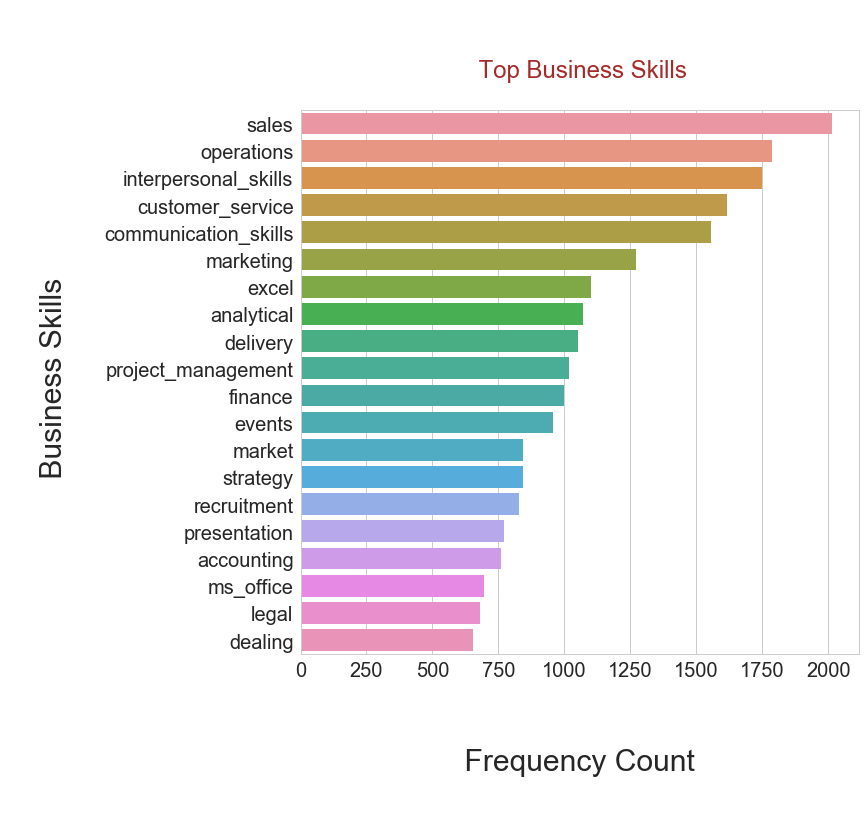

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n# Plotting Style\n\nsns.set(style="whitegrid", color_codes=True)\nfig, ax = plt.subplots()\nfig.set_size_inches(10, 50)\n# Barplot of the Political Parties \n\nsns.barplot(y_sort,x_sort)\n\n#Axes Labelling\n\nplt.ylabel(\'\n Top Skills\n\', fontsize=10)\nplt.xlabel(\'\n\n Frequency Count \n\', fontsize=14)\nplt.title(\'\n\n Top Skill Sets\n\', color=\'Brown\')\n#plt.figure(figsize=(200,15))\n#Display Plot\n\nplt.show()\n\nfig.savefig(\'business.png\')\n'

In [63]:
bag_of_business_skills = ['sales', 'operations', 'customer_service', 'communication_skills', 'comptiance', 'marketing', 'excel',
                    
                         'analytical', 'delivery', 'relationship', 'project_management', 'finance', 'finance', 'events', 'market', 
                         'strategy', 'recruitment', 'presentation', 'accounting', 'interpersonal_skills', 'ms_office', 'legal',
                         'dealing']


x_business = []
y_business =[]

zip_all_skills = zip(x_sort, y_sort) #contains all business skills and corresponding frequencies 

for x,y in zip_all_skills: 
    
    if x in bag_of_business_skills: #if technical skills in the bag of programming languages 
        x_business.append(x) #append techincal skills
        y_business.append(y)
        
        

synonyms = [
    ['interpersonal_skills', 'relationship']
]

def combine_synonyms(x_names,y_freqs):
    #Holds the frequencies of words (key:value) = (word:count)
    combined = {}

    for old_name,old_freq in zip(x_names,y_freqs):
        added = False
        for syn_list in synonyms:
            syn_title = syn_list[0]
            if old_name in syn_list:
                old_count = combined.get(syn_title,0) #Get the count of the synonym. If it's not in combined, return a 0
                new_count = old_count + old_freq
                combined[syn_title] = new_count # (key:value) = (word:count)
                added = True

        #If no synonyms were found, then add the item
        if not added:
            combined[old_name] = old_freq

    #convert to a list, and sort it 
    x = list(combined.keys())
    y = list(combined.values())
    inds = np.argsort(y)[::-1] #sort in descending order
    y = np.array(y)[inds].tolist()
    x = np.array(x)[inds].tolist()

    return x,y

x_business, y_business = combine_synonyms(x_business,y_business)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# Barplot of the Political Parties 

sns.barplot(y_business,x_business)

#Axes Labelling

plt.ylabel('\n Business Skills\n', fontsize=30)
plt.xlabel('\n\n Frequency Count \n', fontsize=30)
plt.title('\n\n Top Business Skills\n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()

'''
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting Style

sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(10, 50)
# Barplot of the Political Parties 

sns.barplot(y_sort,x_sort)

#Axes Labelling

plt.ylabel('\n Top Skills\n', fontsize=10)
plt.xlabel('\n\n Frequency Count \n', fontsize=14)
plt.title('\n\n Top Skill Sets\n', color='Brown')
#plt.figure(figsize=(200,15))
#Display Plot

plt.show()

fig.savefig('business.png')
'''